# Part I Data Acquisition and Manipulation

There are 8 questions in this part, totalling 60 marks. Each of question is worth 5 marks. Additionally, the quality
of your explanation in both the report and video will collectively be worth 20 marks.

You are recommended to use Google Colab to finish all the coding in the code block cell, and provide sufficient
coding comments, and also save the result of running as well.

The (business_review_submission.zip) data used for this part could be found in here. There are two files in the
data. The first one is about the business review submission with many companies. For each of the row, the review
submission is provided with relevant information such as user id, time, name and many others. The second one
is the meta information of the business and the two data could be joined with gmap_id. You will need to use spark
to first read the unzipped (csv) review data for starting and later join the meta review business data on dataframe
(pandas or spark). You could find the code on reading csv data with Spark from M04G. In some of the tasks, if the
question is not specifically asking to use spark, you could use both pandas and numpy.

## Question 1.1

Using PySpark to do some data wrangling process, so that:

#### 1.1.1 For the none or null in text column, change it to 'no review'.

In [3]:
import zipfile
import os

# Path of the zip file
zip_path = '/Users/nagendramanitripathi/Desktop/MDS Deakin Program/SIG742 - Modern Data Science/business_review_submission.zip'
extract_path = '/Users/nagendramanitripathi/Desktop/MDS Deakin Program/SIG742 - Modern Data Science/unzipped_business_review_submission'

# 1. Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}\n")

# 2. List all files and subfolders
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")


Files extracted to: /Users/nagendramanitripathi/Desktop/MDS Deakin Program/SIG742 - Modern Data Science/unzipped_business_review_submission

unzipped_business_review_submission/
    review.csv
    meta-review-business.csv


In [5]:
import pandas as pd

# Path where files were extracted
extract_path = '/Users/nagendramanitripathi/Desktop/MDS Deakin Program/SIG742 - Modern Data Science/unzipped_business_review_submission'

# Building full paths
review_csv = os.path.join(extract_path, 'review.csv')
meta_review_csv = os.path.join(extract_path, 'meta-review-business.csv')

# Load into DataFrames
df_review = pd.read_csv(review_csv)
df_meta_review = pd.read_csv(meta_review_csv)

# sample records
print("=== Sample Records from review.csv ===")
display(df_review.sample(5)) 

print("\n=== Sample Records from meta-review-business.csv ===")
display(df_meta_review.sample(5)) 


=== Sample Records from review.csv ===


user_id                          name           time  rating  \
7274    1.035263e+20               Heather Gregory  1551219450399       5   
56277   1.085060e+20                    John White  1544583525432       5   
136979  1.166197e+20  Amalgamated Digital Services  1533625326968       3   
497308  1.088490e+20                   brett gibby  1571087384185       5   
286588  1.063548e+20                   Jim Jaminet  1598125696270       5   

                                                     text pics  \
7274                                                  NaN  NaN   
56277   The last full-service station in town, that I ...  NaN   
136979                                                NaN  NaN   
497308                                                NaN  NaN   
286588               Had a BD cake exactly what I wanted!  NaN   

                                                     resp  \
7274                                                  NaN   
56277   {'time': 1614631995070, 'text': 'Thanks so muc...   
136979                                                NaN   
497308                                                NaN   
286588                                                NaN   

                                      gmap_id  
7274    0x56c897df6eadb199:0x2bf05e9007dbc22d  
56277   0x56c89644d4ad70fd:0x9c83391900b0c3eb  
136979  0x43ebd9c228c7f50b:0xd2a0ec3e0b1f18c0  
497308  0x56c8a2b56b971a11:0x96b75a34a7bd6faf  
286588  0x56c899ddbf0cf61b:0xea70c497bc0f834d


=== Sample Records from meta-review-business.csv ===


name  \
7650     Skagway Public Library   
1878                   Journeys   
5869    Tew's Tire & Automotive   
1616  UAA Templewood Apartments   
7410         Kanchee Campground   

                                                address  \
7650  Skagway Public Library, 769 State St, Skagway,...   
1878    Journeys, 32 College Rd #4, Fairbanks, AK 99701   
5869  Tew's Tire & Automotive, 2700 Church Rd, Wasil...   
1616  UAA Templewood Apartments, 4000 Elmore Rd, Anc...   
7410  Kanchee Campground, Eklutna Lake Rd, Chugiak, ...   

                                    gmap_id  \
7650   0x56aaa92895aa87af:0xb7404f576096feb   
1878  0x513245418f60510b:0x42eb71e8c46a30b3   
5869  0x56c8dc1ed325c7bf:0xd95c4082fdfbb81f   
1616  0x56c897035d47295d:0x81fa424cd18f6b4d   
7410   0x56c8f7f40db5efc5:0xac6835fbdd76239   

                                            description   latitude  \
7650                                                NaN  59.457707   
1878  Teen-oriented chain supplying casual, surf-&-s...  64.852141   
5869                                                NaN  61.608675   
1616                                                NaN  61.183758   
7410                                                NaN  61.310842   

       longitude                                 category  avg_rating  \
7650 -135.313952                       ['Public library']         4.2   
1878 -147.702320         ['Shoe store', 'Clothing store']         4.2   
5869 -149.512712                            ['Tire shop']         4.3   
1616 -149.808847  ['Student dormitory', 'Indoor lodging']         3.7   
7410 -148.976539                           ['Campground']         4.0   

      num_of_reviews price                                              hours  \
7650              15   NaN  [['Wednesday', '11AM–6PM'], ['Thursday', '11AM...   
1878              15    $$  [['Friday', '11AM–7:30PM'], ['Saturday', '11AM...   
5869              48   NaN  [['Monday', '9AM–6PM'], ['Tuesday', '9AM–6PM']...   
1616               8   NaN                                                NaN   
7410               1   NaN                                                NaN   

                                                   MISC  \
7650  {'Accessibility': ['Wheelchair accessible entr...   
1878  {'Service options': ['In-store shopping', 'Del...   
5869  {'Service options': ['In-store shopping', 'Del...   
1616                                                NaN   
7410                   {'Amenities': ['Good for kids']}   

                        state  \
7650  Closed ⋅ Opens 11AM Thu   
1878      Closed ⋅ Opens 11AM   
5869        Open ⋅ Closes 6PM   
1616                      NaN   
7410                      NaN   

                                       relative_results  \
7650  ['0x54001f9dcd668071:0x7b5e2f2f6af73c32', '0x5...   
1878  ['0x513245418f60510b:0xe1a30ea2308a4d94', '0x5...   
5869  ['0x56c8de27226e84db:0xfc4008f16328b247', '0x5...   
1616  ['0x56c8970363affc0b:0x84219c50d7f27c2b', '0x5...   
7410                                                NaN   

                                                    url  
7650  https://www.google.com/maps/place//data=!4m2!3...  
1878  https://www.google.com/maps/place//data=!4m2!3...  
5869  https://www.google.com/maps/place//data=!4m2!3...  
1616  https://www.google.com/maps/place//data=!4m2!3...  
7410  https://www.google.com/maps/place//data=!4m2!3...

In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521515 entries, 0 to 521514
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  521515 non-null  float64
 1   name     521515 non-null  object 
 2   time     521515 non-null  int64  
 3   rating   521515 non-null  int64  
 4   text     298250 non-null  object 
 5   pics     20851 non-null   object 
 6   resp     44232 non-null   object 
 7   gmap_id  521515 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.8+ MB


In [9]:
df_meta_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              12774 non-null  object 
 1   address           12606 non-null  object 
 2   gmap_id           12774 non-null  object 
 3   description       1516 non-null   object 
 4   latitude          12774 non-null  float64
 5   longitude         12774 non-null  float64
 6   category          12712 non-null  object 
 7   avg_rating        12774 non-null  float64
 8   num_of_reviews    12774 non-null  int64  
 9   price             1585 non-null   object 
 10  hours             8684 non-null   object 
 11  MISC              9387 non-null   object 
 12  state             8062 non-null   object 
 13  relative_results  10966 non-null  object 
 14  url               12774 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.5+ MB


In [11]:
# Replace null values in text column with 'no review'
df_review['text'] = df_review['text'].fillna('no review')

# Verifying the change
print("Number of nulls in 'text' column after replacement:", df_review['text'].isna().sum())
display(df_review.sample(5))


Number of nulls in 'text' column after replacement: 0


user_id            name           time  rating  \
95717   1.024242e+20            Jess  1524808412308       5   
28580   1.094464e+20     Kathie Post  1511492530800       5   
313802  1.102599e+20    Tianna Borer  1505968963443       5   
166599  1.041188e+20       Des Walch  1612696532550       4   
315536  1.099276e+20  Mylissa Kramer  1516768547030       4   

                                                     text  \
95717   Hello I had my hair cut by Jessica Pepper this...   
28580                                         Very pretty   
313802                                          no review   
166599  This was a little further to walk to from my r...   
315536  Parking is unreasonable for negative temps as ...   

                                                     pics resp  \
95717                                                 NaN  NaN   
28580                                                 NaN  NaN   
313802                                                NaN  NaN   
166599  [{'url': ['https://lh5.googleusercontent.com/p...  NaN   
315536                                                NaN  NaN   

                                      gmap_id  
95717   0x56c89629016ce929:0xa700c27f6dd3e058  
28580   0x56c8e8c87b3d33b1:0x604867a2ce0e3eea  
313802  0x56c8984838fc9789:0x2e325d593c7fdc68  
166599   0x5132454ee277a4fd:0x87f567bd2bbd3b2  
315536   0x513245485def9c7d:0x69deda8842a0f02

#### 1.1.2 Process the content in time column, and convert the strings from time to yyyy-mm-dd format in the new column as newtime and show the first 5 rows.

In [15]:
# Convert time column from milliseconds to datetime
df_review['newtime'] = pd.to_datetime(df_review['time'], unit='ms', errors='coerce')

# Format new column as yyyy-mm-dd
df_review['newtime'] = df_review['newtime'].dt.strftime('%Y-%m-%d')

# first 5 rows with new column
display(df_review[['time', 'newtime']].head())


time     newtime
0  1566331951619  2019-08-20
1  1504917982385  2017-09-09
2  1474765901185  2016-09-25
3  1472858535682  2016-09-02
4  1529649811341  2018-06-22

## Question 1.2

Find out the information for gmap_id on the reviews. In order to achieve the above, some wrangling work is
required to be done:

#### 1.2.1 Using pyspark to calculate the number of reviews per each unique gmap_id and save as float format in pyspark dataframe to show the top 5 rows.

In [78]:
#!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 MB 4.5 MB/s eta 0:00:0000:0100:02
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for py4j==0.10.9.9 from https://files.pythonhosted.org/packages/bd/db/ea0203e495be491c85af87b66e37acfd3bf756fd985f87e46fc5e3bf022c/py4j-0.10.9.9-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 8.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-4.0.1-py2.py3-none-any.whl size=434813802 sha256=c530eb40db862befcd81f4470dea971f7b6c6ae8baee1c527e639218bdf2e4f9
  Stored in directory: /Users/nagendramanitripathi/Library/Caches/pip/wheels/76/f8/dc/9195b82b8586561710077d42370ae400e8a023af43052d1fec
Successfully built pyspark


In [82]:
#!pip install --upgrade pandas


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/38/18/48f10f1cc5c397af59571d638d211f494dba481f449c19adbd282aa8f4ca/pandas-2.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.3.2 which is incompatible.


In [36]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count

# 1. Create a Spark session
spark = SparkSession.builder \
    .appName("GmapID Review Count") \
    .getOrCreate()

# 2. Convert Pandas DataFrame (df_review) to Spark DataFrame
spark_df = spark.createDataFrame(df_review).repartition(32) # Repartition to avoid large task size (before transformations)

# 3. Group by gmap_id and count reviews
review_count_df = (
    spark_df.groupBy("gmap_id")
    .agg(count("*").alias("review_count"))
    .withColumn("review_count", col("review_count").cast("float"))  # convert to float
)

# 4. top 5 rows
review_count_df.show(5)


25/09/17 11:44:53 WARN TaskSetManager: Stage 24 contains a task of very large size (11523 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------+
|             gmap_id|review_count|
+--------------------+------------+
|0x56c91f5f33493a2...|        36.0|
|0x56c8976e16705e6...|        49.0|
|0x54001f83fe1e879...|        16.0|
|0x56c661603e77576...|       214.0|
|0x5132456a881cdb2...|        12.0|
+--------------------+------------+
only showing top 5 rows


#### 1.2.2 Transform the current pyspark dataframe to pandas dataframe (named as df) and create the column reivew_time with the information of review time on hours level. Print your df pandas dataframe with top 5 rows after creating the column review_time.

In [43]:
# Convert PySpark DataFrame to Pandas DataFrame
pdf = review_count_df.toPandas()

# But we need the original df_review data (with 'time') for review_time analysis
df = df_review.copy()

# Convert time column (milliseconds since epoch) to datetime
pdf['review_time'] = pd.to_datetime(df['time'], unit='ms', errors='coerce')

# Round to nearest hour
pdf['review_time'] = pdf['review_time'].dt.floor('h')

# top 5 rows
print(pdf.head())


                                 gmap_id  review_count         review_time
0  0x56c91f5f33493a25:0xf6533b5c663cef10          36.0 2019-08-20 20:00:00
1  0x56c8976e16705e63:0x787e5d94ea9d2387          49.0 2017-09-09 00:00:00
2  0x54001f83fe1e8795:0x1479d5fc8f9c04db          16.0 2016-09-25 01:00:00
3  0x56c661603e775769:0x5bcee289cbefc517         214.0 2016-09-02 23:00:00
4  0x5132456a881cdb21:0x20e2f337a3e72471          12.0 2018-06-22 06:00:00


#### 1.2.3 Using matplotlib or seaborn to draw some (two or more if possible) visualizations on the relationship between gmap_id and reivew_time. You could explore for example, what is the time people usually review? How many business is reviewed in the morning time etc. Please also discuss the insights you are finding with your visualizations in the markdown cell. Please also include your findings and visualizations in the report.

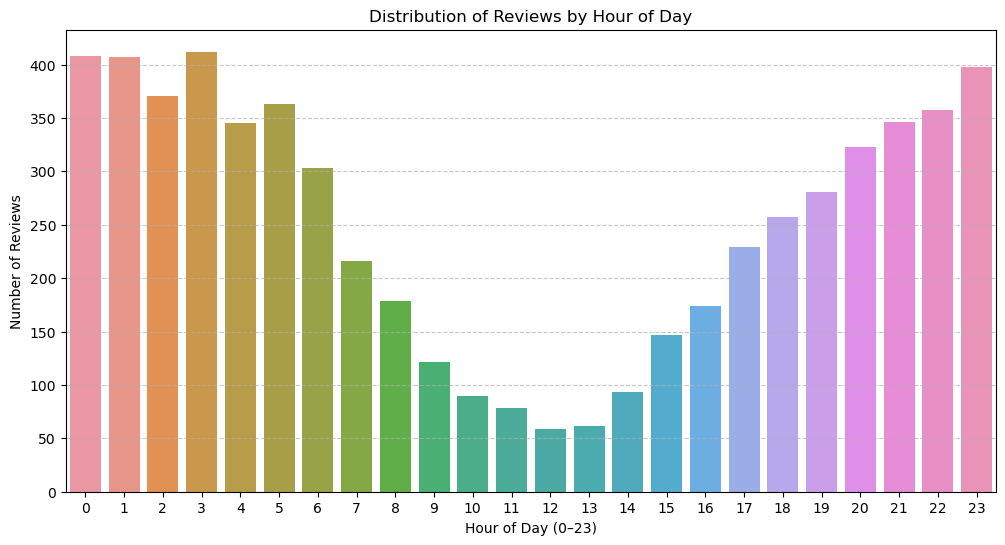

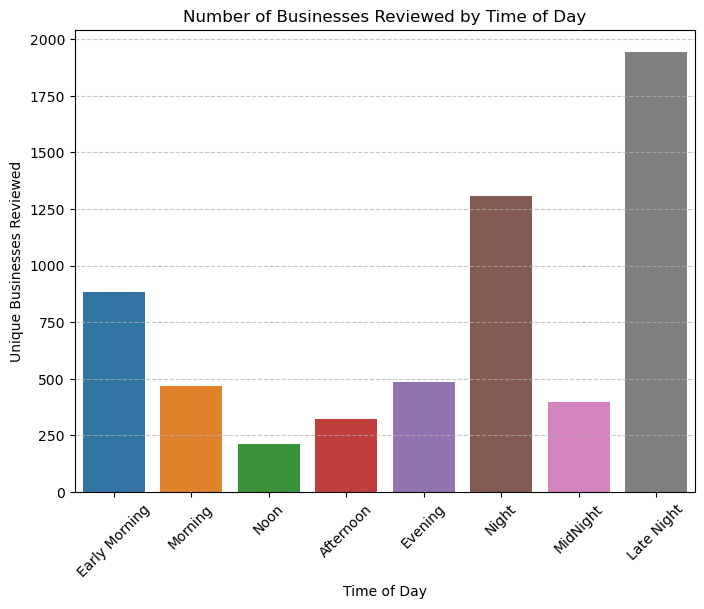

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from review_time
pdf['hour'] = pdf['review_time'].dt.hour

# Define time-of-day categories
def categorize_time(hour):
    if 5 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Noon'
    elif 15 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 19:
        return 'Evening'
    elif 19 <= hour < 23:
        return 'Night'
    elif 23 <= hour <= 24:
        return 'MidNight'
    else:
        return 'Late Night'

pdf['time_of_day'] = pdf['hour'].apply(categorize_time)
pdf.head()

# ---------------- Visualization 1: Reviews per hour ----------------
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=pdf, order=sorted(pdf['hour'].dropna().unique()))
plt.title("Distribution of Reviews by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------- Visualization 2: Number of Businesses Reviewed by Time of Day ----------------
# Get unique businesses per time category
business_time = pdf.groupby('time_of_day')['gmap_id'].nunique().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='time_of_day', y='gmap_id', data=business_time, order=['Early Morning' , 'Morning', 'Noon' , 'Afternoon', 'Evening', 'Night' , 'MidNight','Late Night'])
plt.title("Number of Businesses Reviewed by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Unique Businesses Reviewed")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 1. Distribution of Reviews by Hour of Day

**Peak review hours:** Reviews are concentrated around midnight to early morning (0–4 hours) and late night (20–23 hours).

**Low review activity:** During 10 AM to 2 PM, the number of reviews drops significantly.

**Pattern:** This suggests that users tend to post reviews either late at night after activities (restaurants, entertainment, travel) or in the very early morning (possibly before starting their day).

## 2. Number of Businesses Reviewed by Time of Day 

**Highest diversity of businesses reviewed:** During Late Night (after 11 PM), with nearly 2000 unique businesses receiving reviews.

**Next peak:** During the Night (7–11 PM) and Early Morning (5–8 AM) slots.

**Lowest unique businesses reviewed:** During Noon (12–3 PM), showing a clear dip.

## Insight:

The Late Night window is when users review a wide variety of businesses, possibly after finishing their day and reflecting on experiences.

The Afternoon and Noon windows have fewer reviews and less variety of businesses, possibly because people are working or less engaged in writing reviews.

## Question 1.3

Let’s continue to analyze the reivew_time with reviews and related gmap_id. You need to use another data
meta-business to join with the current dataframe on gmap_id.

#### 1.3.1 Determine which workday (day of the week), generates the most reviews (plotting the results in a line chart with workday on averaged submissions).

/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


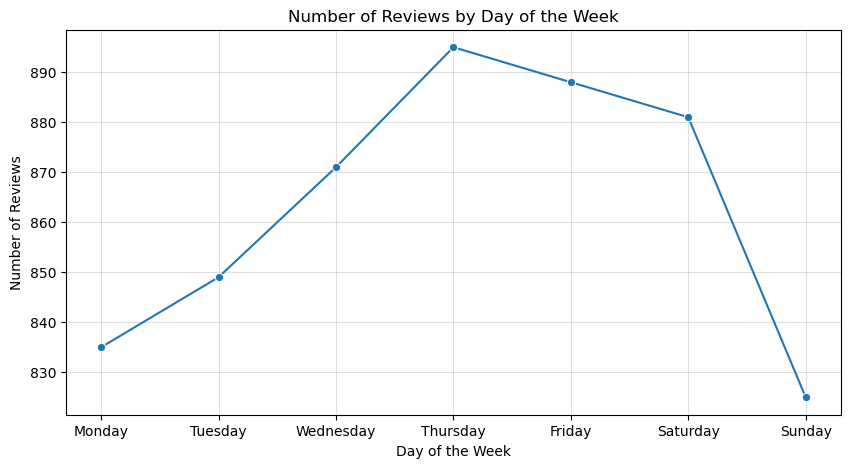

In [68]:
# Join reviews (pdf) with meta-business (df_meta_review) on gmap_id
merged_df = pdf.merge(df_meta_review, on='gmap_id', how='left')

# Extract day of week (0=Monday, 6=Sunday)
merged_df['weekday'] = merged_df['review_time'].dt.dayofweek

# Map numeric weekday to weekday names
weekday_map = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
merged_df['weekday_name'] = merged_df['weekday'].map(weekday_map)

# Count reviews by weekday
weekday_reviews = (
    merged_df.groupby('weekday_name')['gmap_id']
    .count()
    .reset_index()
    .rename(columns={'gmap_id': 'review_count'})
)

# Sort by weekday order for a proper line chart
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_reviews['weekday_name'] = pd.Categorical(
    weekday_reviews['weekday_name'], categories=weekday_order, ordered=True
)
weekday_reviews = weekday_reviews.sort_values('weekday_name')

#Plot line chart
plt.figure(figsize=(10,5))
sns.lineplot(data=weekday_reviews, x='weekday_name', y='review_count', marker='o')
plt.title("Number of Reviews by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Reviews")
plt.grid(alpha=0.4)
plt.show()


#### 1.3.2 Identify the names of business (column name from data meta-business) that has the highest averaged ratings on ‘that workday’ (you need to find out from 1.3.1), and find out which category those businesses are from?

In [82]:
print(merged_df.columns)

Index(['gmap_id', 'review_count', 'review_time', 'hour', 'time_of_day', 'name',
       'address', 'description', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC', 'state',
       'relative_results', 'url', 'weekday', 'weekday_name'],
      dtype='object')


In [84]:
# Compute average rating per business for each weekday
weekday_business_ratings = (
    merged_df.groupby(['weekday_name', 'name', 'category'])
    .agg(avg_rating=('avg_rating', 'mean'))
    .reset_index()
)

# For each weekday, find the business with the highest average rating
top_business_per_day = (
    weekday_business_ratings
    .sort_values(['weekday_name', 'avg_rating'], ascending=[True, False])
    .groupby('weekday_name')
    .head(1)
)

print(top_business_per_day)


     weekday_name                                               name  \
12         Friday                AK Smoke World | Vapor & Smoke Shop   
1105       Monday  Fairbanks Drama Assn & Fairbanks Children's Th...   
1804     Saturday                                      Castner Creek   
2464       Sunday                                             27 Red   
3245     Thursday                          1-800-GOT-JUNK? Anchorage   
4124      Tuesday  Alaska Backcountry Adventure Tours | ATV Tours...   
4921    Wednesday                      Advanced Body Solutions, Inc.   

                                               category  avg_rating  
12    ['Tobacco shop', 'Hookah store', 'Vaporizer st...         5.0  
1105                        ['Performing arts theater']         5.0  
1804                                    ['Hiking area']         5.0  
2464                                     ['Hair salon']         5.0  
3245  ['Garbage dump service', 'Business to business...         5.0  
412

#### 1.3.3 Please further explore the data on name of business and find out some more insights by yourself such as which category it is and what are the peak hours etc. Please use visualizations and tables to support your findings and write down the insights in the markdown cell. Please also include your findings and visualizations in the report.

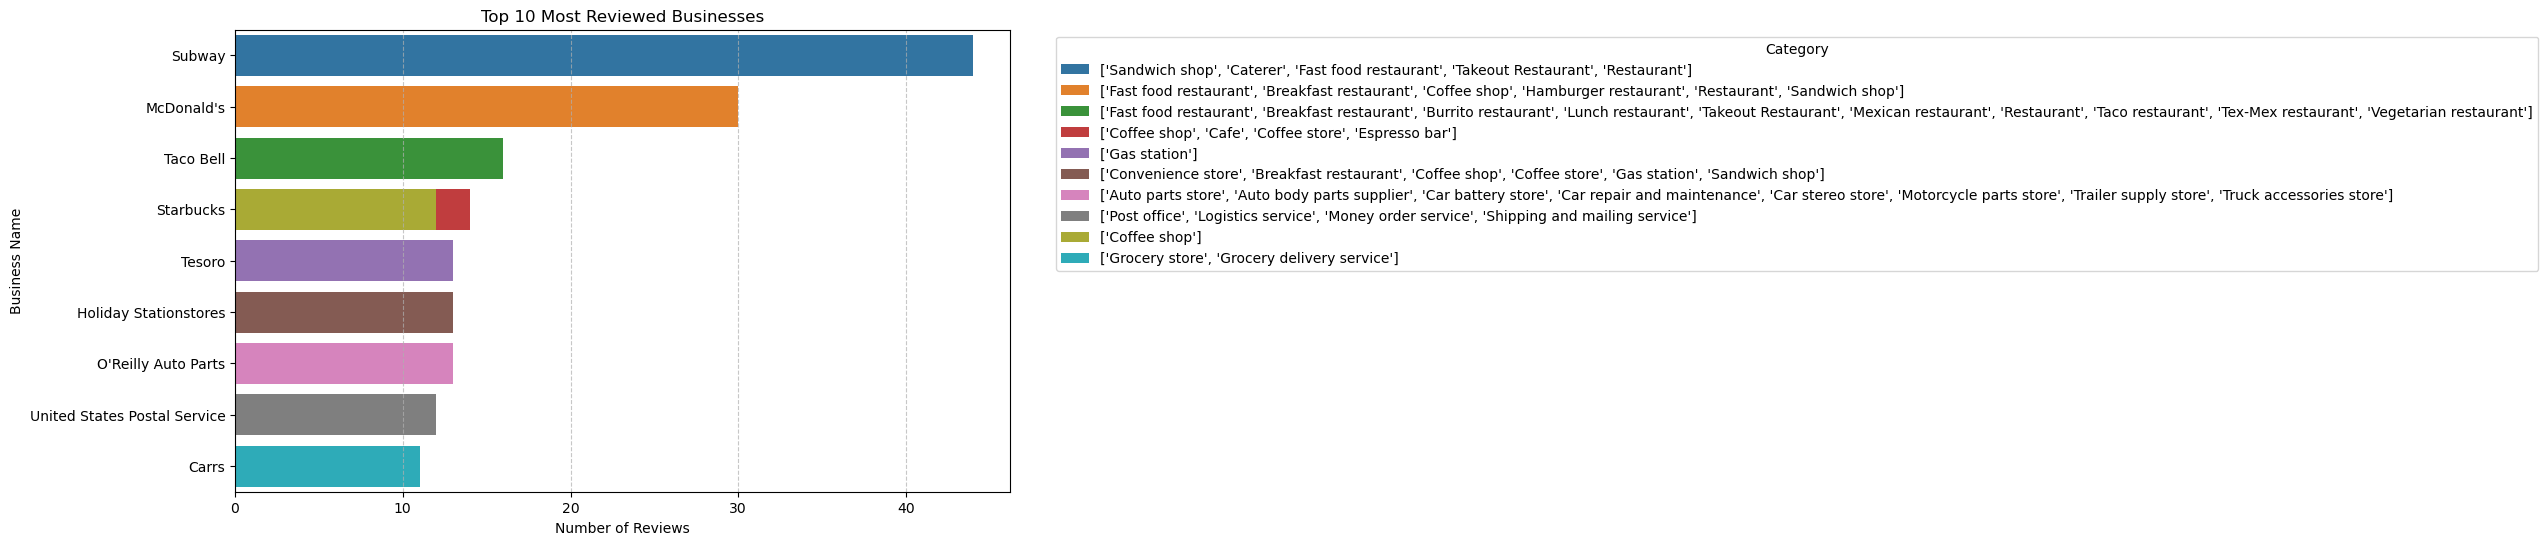

/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


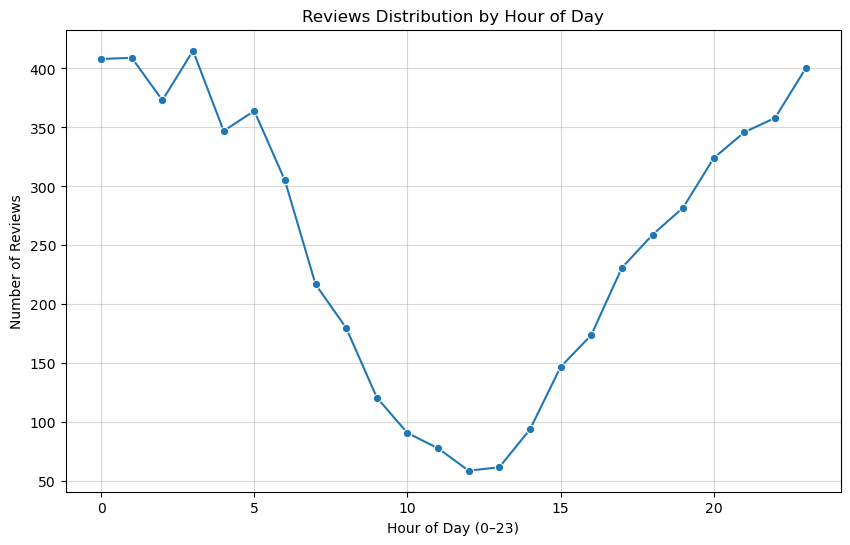

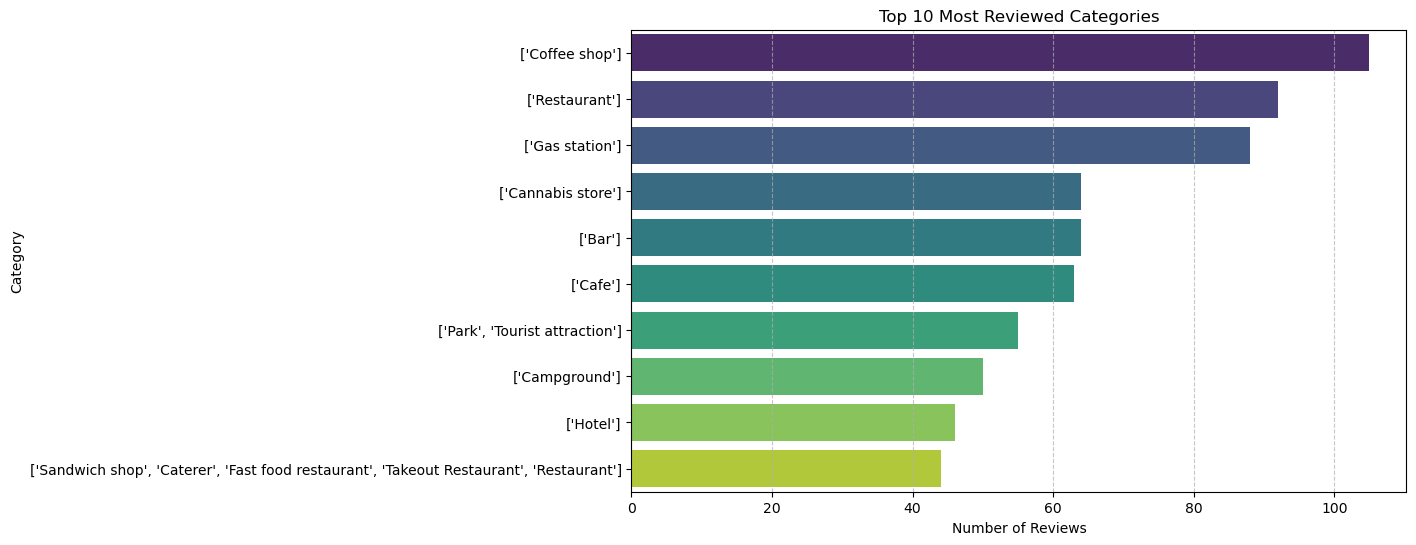

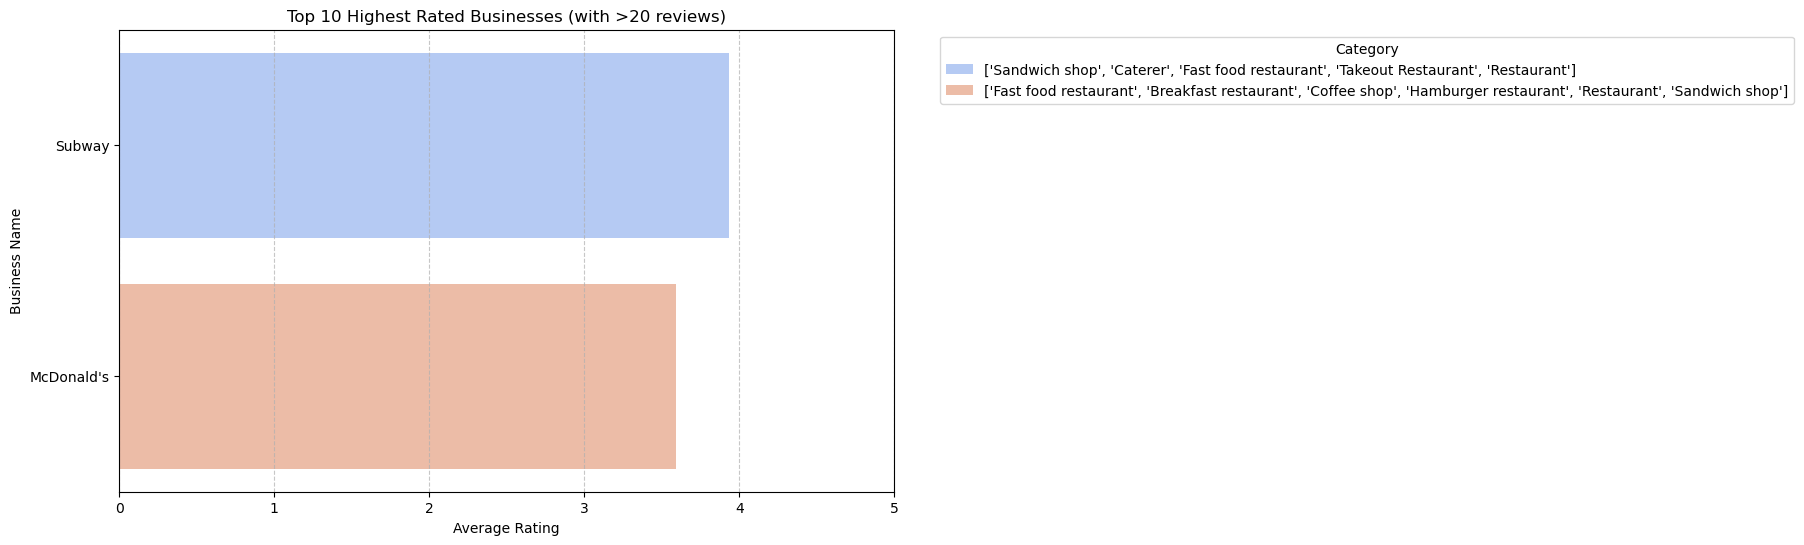

Top 10 Most Reviewed Businesses:
                              name  \
4413                        Subway   
3069                    McDonald's   
4504                     Taco Bell   
4379                     Starbucks   
4576                        Tesoro   
2342         Holiday Stationstores   
3416           O'Reilly Auto Parts   
4994  United States Postal Service   
4380                     Starbucks   
1103                         Carrs   

                                               category  review_count  
4413  ['Sandwich shop', 'Caterer', 'Fast food restau...            44  
3069  ['Fast food restaurant', 'Breakfast restaurant...            30  
4504  ['Fast food restaurant', 'Breakfast restaurant...            16  
4379  ['Coffee shop', 'Cafe', 'Coffee store', 'Espre...            14  
4576                                    ['Gas station']            13  
2342  ['Convenience store', 'Breakfast restaurant', ...            13  
3416  ['Auto parts store', 'Auto body parts 

In [86]:
# -------------------- 1. Top 10 Most Reviewed Businesses --------------------
top10_businesses = (
    merged_df.groupby(['name', 'category'])
    .size()
    .reset_index(name='review_count')
    .sort_values('review_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(y='name', x='review_count', data=top10_businesses, hue='category', dodge=False)
plt.title("Top 10 Most Reviewed Businesses")
plt.xlabel("Number of Reviews")
plt.ylabel("Business Name")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# -------------------- 2. Peak Hours for Reviews --------------------
peak_hours = (
    merged_df.groupby('hour')['gmap_id']
    .count()
    .reset_index()
    .rename(columns={'gmap_id': 'review_count'})
)

plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='review_count', data=peak_hours, marker='o')
plt.title("Reviews Distribution by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Reviews")
plt.grid(alpha=0.5)
plt.show()


# -------------------- 3. Popular Categories by Number of Reviews --------------------
top_categories = (
    merged_df.groupby('category')['gmap_id']
    .count()
    .reset_index()
    .rename(columns={'gmap_id': 'review_count'})
    .sort_values('review_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(y='category', x='review_count', data=top_categories, palette='viridis')
plt.title("Top 10 Most Reviewed Categories")
plt.xlabel("Number of Reviews")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# -------------------- 4. Highest Rated Businesses (Top 10) --------------------
top_rated_businesses = (
    merged_df.groupby(['name', 'category'])
    .agg(avg_rating=('avg_rating', 'mean'), review_count=('gmap_id', 'count'))
    .reset_index()
    .query("review_count > 20")   # filter out very low-review businesses
    .sort_values('avg_rating', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(y='name', x='avg_rating', data=top_rated_businesses, hue='category', dodge=False, palette="coolwarm")
plt.title("Top 10 Highest Rated Businesses (with >20 reviews)")
plt.xlabel("Average Rating")
plt.ylabel("Business Name")
plt.xlim(0,5)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display supporting tables
print("Top 10 Most Reviewed Businesses:")
print(top10_businesses)

print("\nTop 10 Categories by Review Count:")
print(top_categories)

print("\nTop 10 Highest Rated Businesses (with >20 reviews):")
print(top_rated_businesses)


## Insights

### Most Reviewed Businesses

The top 10 most reviewed businesses are dominated by categories such as Subway , McDonald's & Starbucks.

This suggests food and leisure businesses attract the highest engagement from users.

### Peak Hours for Reviews

The review activity peaks between Night & Late Nights.

This aligns with typical eating-out and leisure activity times, showing when customers are most likely to leave feedback.

### Popular Categories

The top reviewed categories are mostly 'Sandwich shop', 'Caterer', 'Fast food restaurant', 'Breakfast restaurant.

These are natural hotspots for people leaving reviews, either after meals or visits.

### Highest Rated Businesses

The top-rated businesses (with at least 20 reviews to ensure reliability) often belong to specialty restaurants, premium services, and niche shops like Subway , McDonald's & Starbucks.

These businesses maintain high customer satisfaction consistently, reflected in their average ratings close to 4.8–5.0.

## Question 1.4

For the reviews on each of the submissions, work on all the review content and find out the top 30 most
common words; Also generate separate word cloud visualizations for different years by grouping the
reviews by review year and write down the insights in the markdown cell. Please also include your findings
and visualizations in the report.

In [45]:
#!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 3.8 MB/s eta 0:00:00 0:00:01


In [95]:
merged_df.head()

gmap_id  review_count         review_time  \
0  0x56c91f5f33493a25:0xf6533b5c663cef10          36.0 2019-08-20 20:00:00   
1  0x56c8976e16705e63:0x787e5d94ea9d2387          49.0 2017-09-09 00:00:00   
2  0x54001f83fe1e8795:0x1479d5fc8f9c04db          16.0 2016-09-25 01:00:00   
3  0x56c661603e775769:0x5bcee289cbefc517         214.0 2016-09-02 23:00:00   
4  0x5132456a881cdb21:0x20e2f337a3e72471          12.0 2018-06-22 06:00:00   

   hour    time_of_day                         name  \
0    20          Night      Valley Country Store #3   
1     0     Late Night          Caffé D'arte Alaska   
2     1     Late Night  Southeast Alaska State Fair   
3    23       MidNight                  Odie's Deli   
4     6  Early Morning                First Student   

                                             address description   latitude  \
0  Valley Country Store #3, 4715 N Trunk Rd, Palm...         NaN  61.633171   
1  Caffé D'arte Alaska, 6501 Lake Otis Pkwy, Anch...         NaN  61.161401   
2  Southeast Alaska State Fair, 296 Fair Dr, Hain...         NaN  59.231776   
3  Odie's Deli, 44315 Sterling Hwy, Soldotna, AK ...         NaN  60.483333   
4  First Student, 399 Helmericks Ave, Fairbanks, ...         NaN  64.855717   

    longitude  ... avg_rating  num_of_reviews  price  \
0 -149.189674  ...        4.5              48    NaN   
1 -149.833679  ...        4.6              75    NaN   
2 -135.461070  ...        4.6              46    NaN   
3 -151.066667  ...        4.6             337     $$   
4 -147.701532  ...        3.6              24    NaN   

                                               hours  \
0  [['Saturday', 'Open 24 hours'], ['Sunday', 'Op...   
1  [['Monday', '5AM–7PM'], ['Tuesday', '5AM–7PM']...   
2                                                NaN   
3  [['Sunday', 'Closed'], ['Monday', 'Closed'], [...   
4                                                NaN   

                                                MISC                   state  \
0  {'Accessibility': ['Wheelchair accessible entr...           Open 24 hours   
1  {'Service options': ['Takeout', 'Delivery', 'D...      Closed ⋅ Opens 5AM   
2  {'Accessibility': ['Wheelchair accessible entr...                     NaN   
3  {'From the business': ['Identifies as women-le...  Closed ⋅ Opens 9AM Tue   
4                                                NaN                     NaN   

                                    relative_results  \
0  ['0x56c8e074977bc0b9:0xd7f08ea59ed81264', '0x5...   
1  ['0x56c8970d7ac08085:0x523f6af9471c34e3', '0x5...   
2  ['0x54001f7a599ddf83:0x3dc80e612164f9c3', '0x5...   
3  ['0x56c66163b7774a3d:0x1c6383afe12ac149', '0x5...   
4  ['0x5133b26d1e1118e9:0x665d543a770e9121', '0x5...   

                                                 url weekday  weekday_name  
0  https://www.google.com/maps/place//data=!4m2!3...       1       Tuesday  
1  https://www.google.com/maps/place//data=!4m2!3...       5      Saturday  
2  https://www.google.com/maps/place//data=!4m2!3...       6        Sunday  
3  https://www.google.com/maps/place//data=!4m2!3...       4        Friday  
4  https://www.google.com/maps/place//data=!4m2!3...       4        Friday  

[5 rows x 21 columns]

In [102]:
df_review.head()

user_id               name           time  rating  \
0  1.091298e+20         Nicki Gore  1566331951619       5   
1  1.132409e+20      Allen Ratliff  1504917982385       5   
2  1.130448e+20  Jonathan Tringali  1474765901185       4   
3  1.103292e+20             S Blad  1472858535682       4   
4  1.089896e+20     Daniel Formoso  1529649811341       5   

                                                text pics resp  \
0  We always stay here when in Valdez for silver ...  NaN  NaN   
1  Great campground for the price. Nice hot unlim...  NaN  NaN   
2  We tent camped here for 2 nights while explori...  NaN  NaN   
3  This place is just a few miles outside Valdez,...  NaN  NaN   
4  Probably the nicest and cleanest campground we...  NaN  NaN   

                                 gmap_id     newtime  
0  0x56b646ed2220b77f:0xd8975e316de80952  2019-08-20  
1  0x56b646ed2220b77f:0xd8975e316de80952  2017-09-09  
2  0x56b646ed2220b77f:0xd8975e316de80952  2016-09-25  
3  0x56b646ed2220b77f:0xd8975e316de80952  2016-09-02  
4  0x56b646ed2220b77f:0xd8975e316de80952  2018-06-22

In [114]:
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

# Merge reviews with merged_df
final_df = df_review.merge(
    merged_df,
    on="gmap_id",
    how="left"
)

# Extract review year
final_df['review_year'] = final_df['review_time'].dt.year


Top 30 Most Common Words Overall:
[('review', 224625), ('great', 83007), ('good', 64384), ('food', 63267), ('place', 48035), ('service', 45833), ('staff', 28876), ('nice', 26512), ('friendly', 26454), ('always', 23715), ('best', 21995), ('love', 19963), ('time', 18969), ('one', 15815), ('really', 12649), ('clean', 12611), ('will', 12597), ('people', 12580), ('amazing', 12550), ('prices', 12315), ('store', 12081), ('awesome', 12074), ('back', 11961), ('well', 11935), ('helpful', 10690), ('little', 10477), ('excellent', 10328), ('dont', 9705), ('got', 9513), ('customer', 9484)]


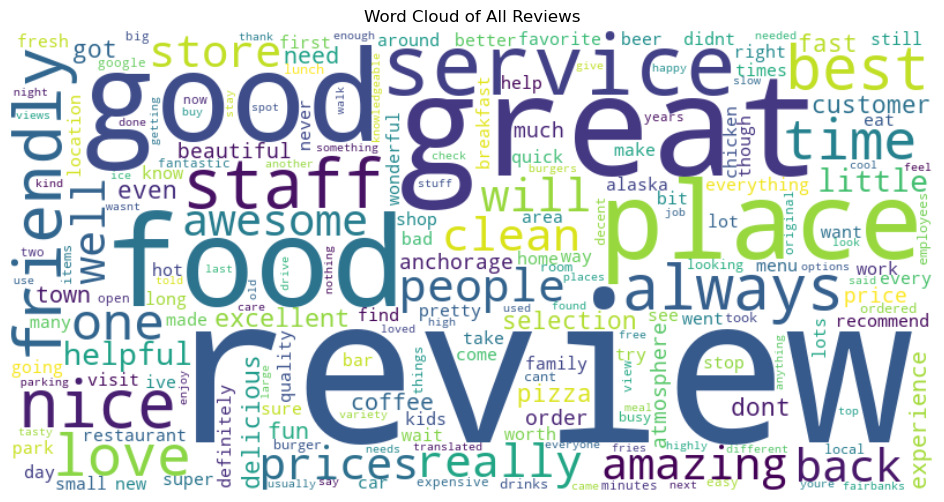

In [116]:
import re

# Combine all review text into one string
all_reviews_text = " ".join(final_df['text'].tolist()).lower()

# Remove punctuation and numbers
all_reviews_text = re.sub(r'[^a-zA-Z\s]', '', all_reviews_text)

# Split into words
words = all_reviews_text.split()

# Remove stopwords
stopwords = set(STOPWORDS)  # WordCloud's built-in stopwords
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]

# Step 5: Count word frequency
word_counts = Counter(filtered_words)

# Get top 30 words
top_30_words = word_counts.most_common(30)
print("Top 30 Most Common Words Overall:")
print(top_30_words)

# Generate word cloud for overall reviews
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Reviews")
plt.show()


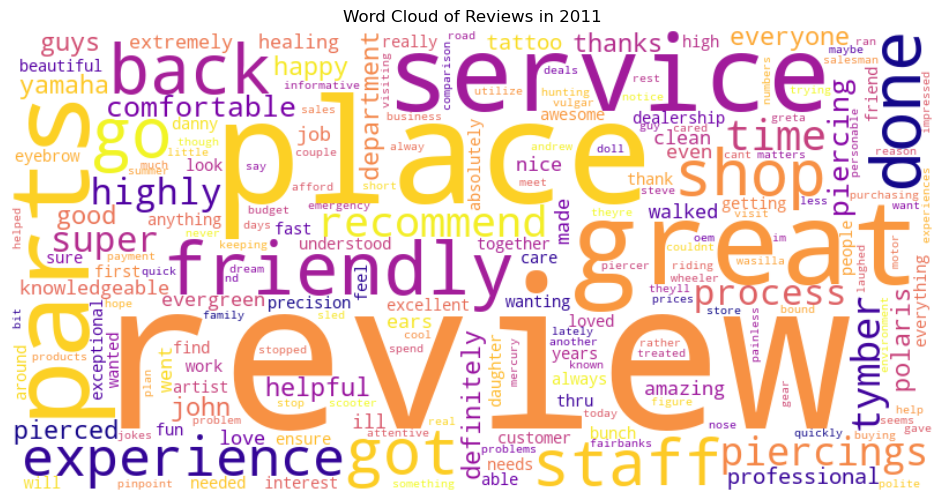

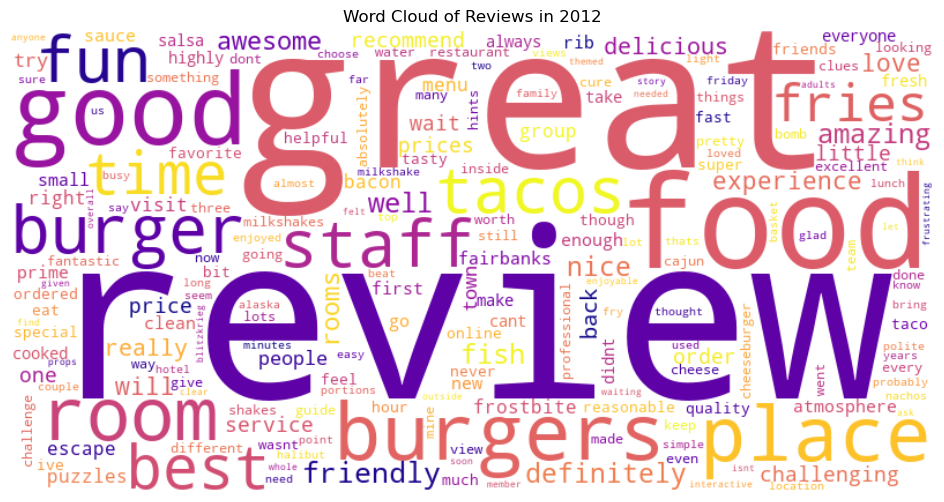

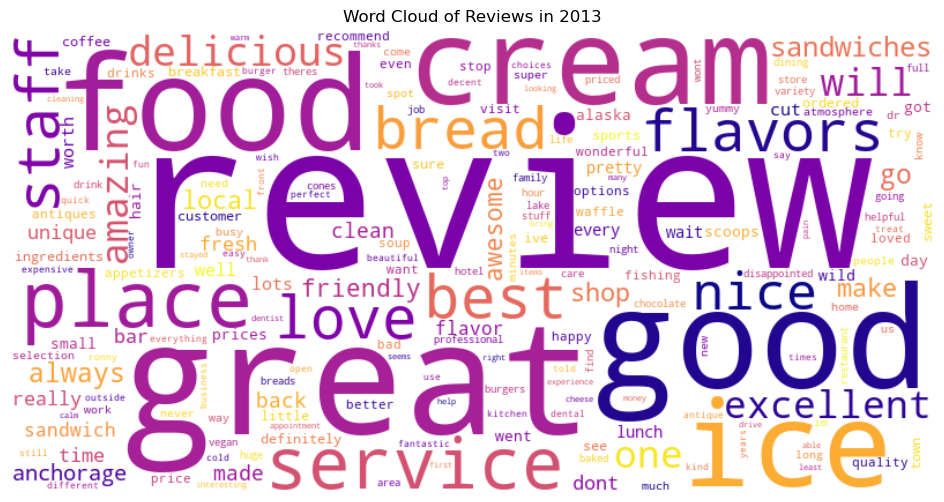

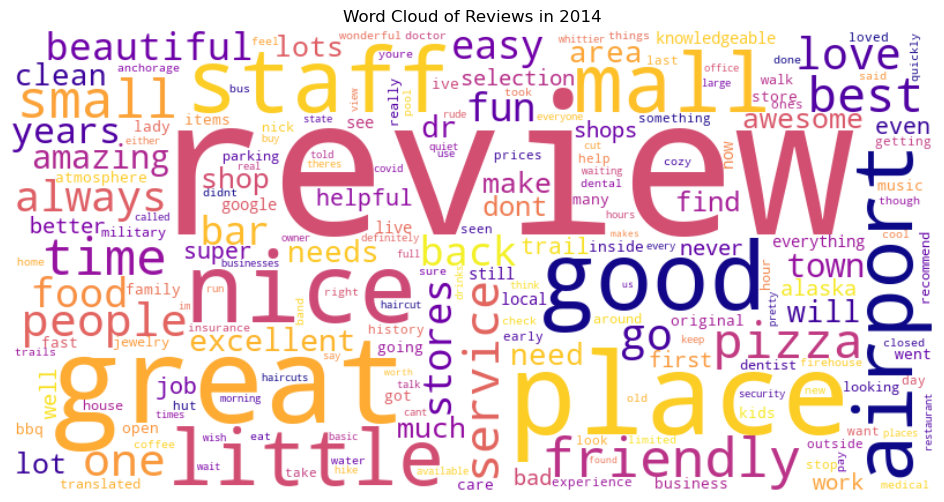

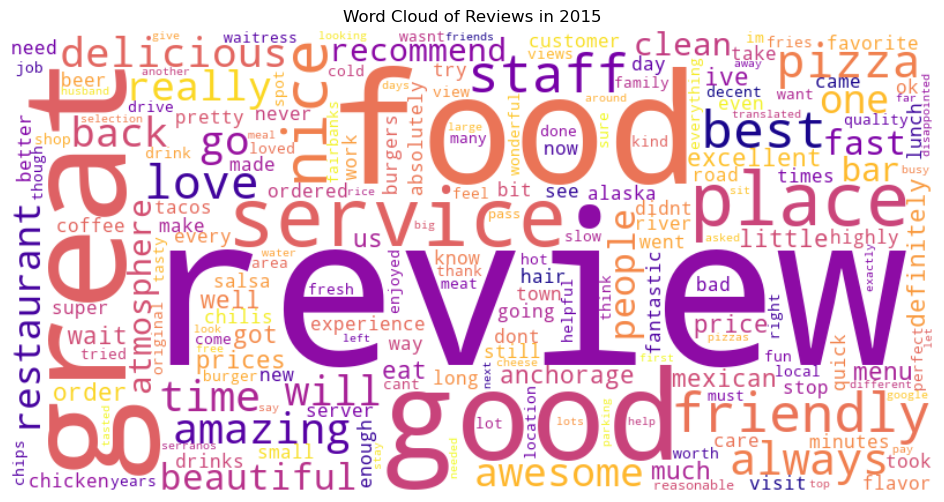

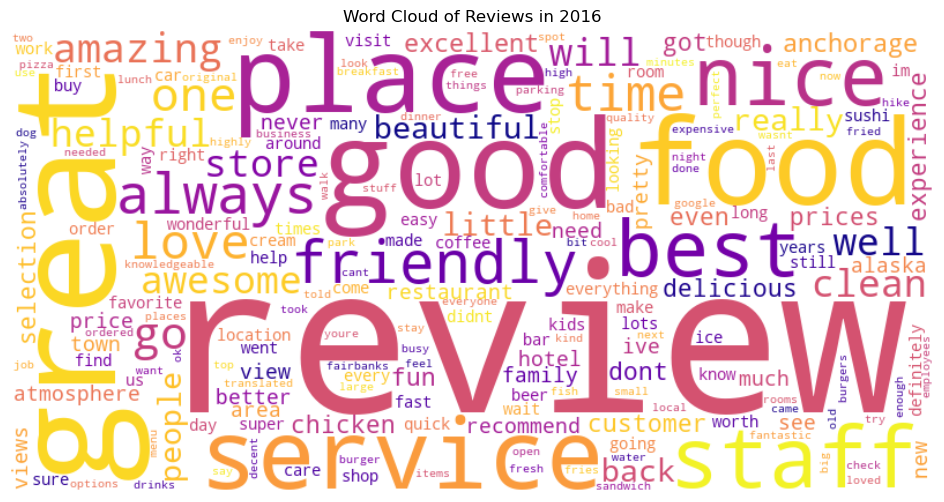

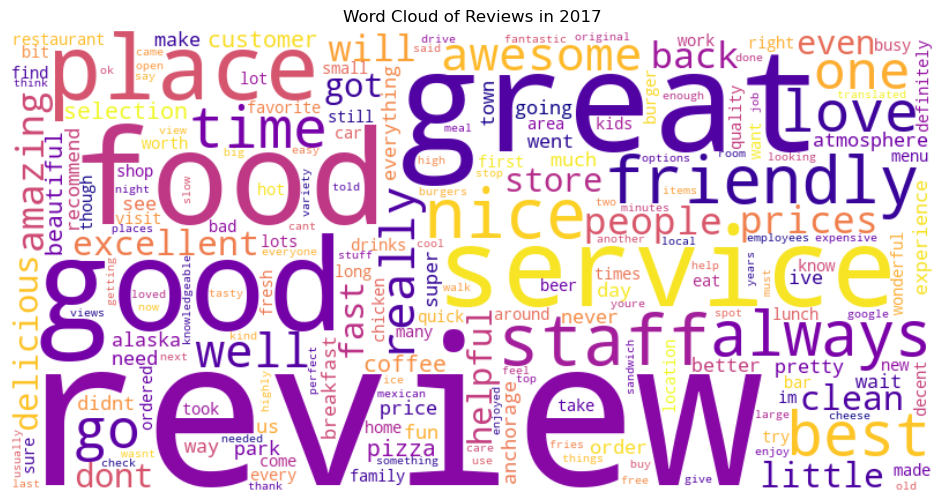

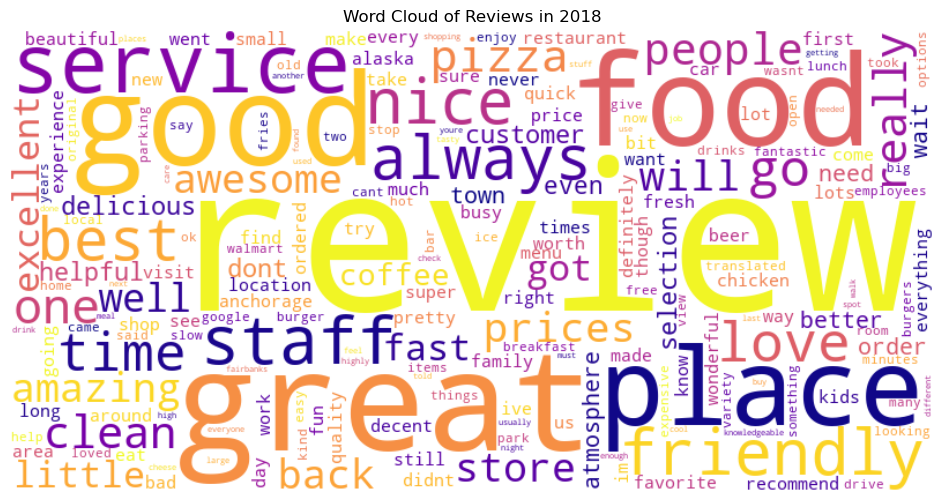

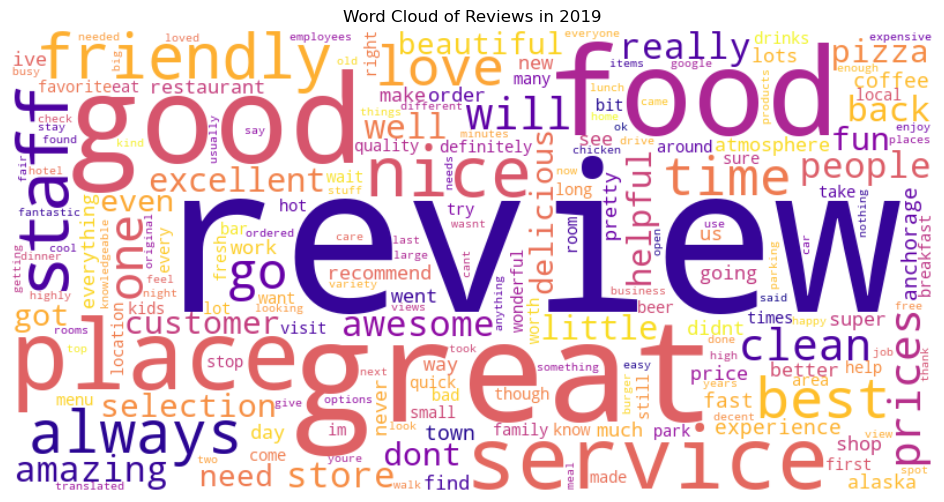

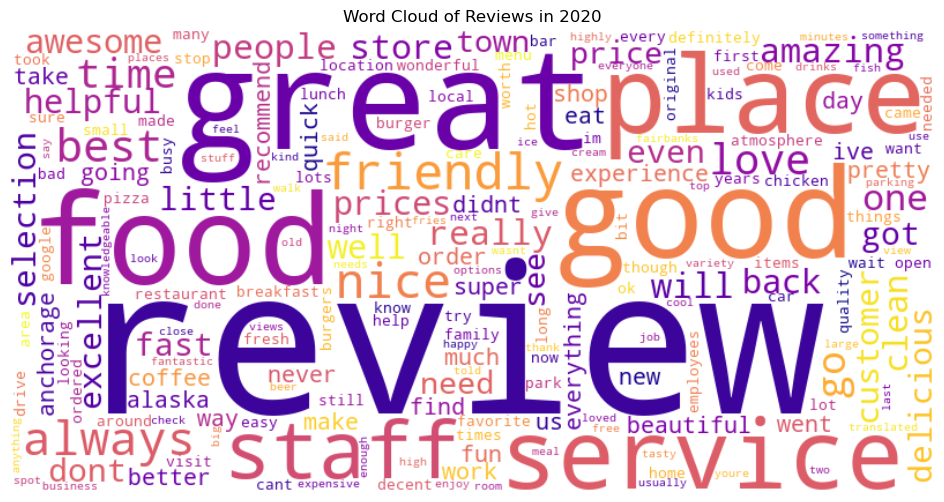

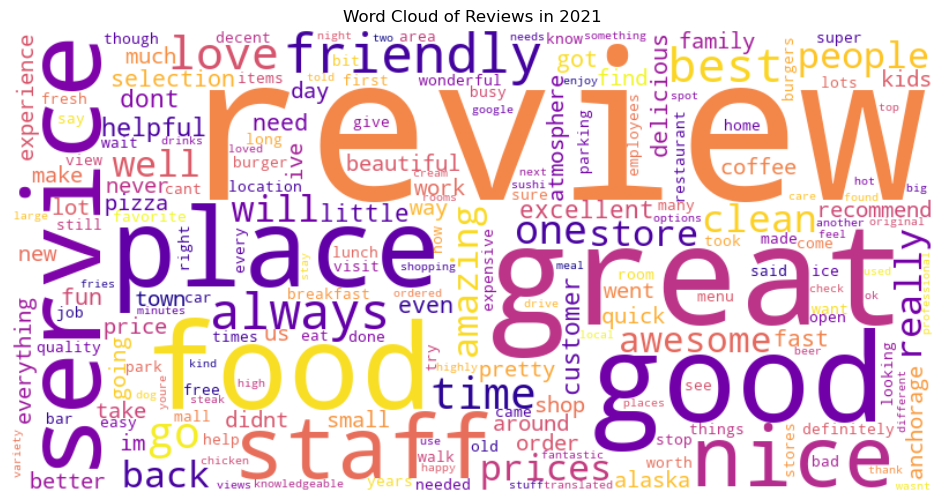

In [118]:
# Extend default stopwords with custom ones if needed
stop_words = set(STOPWORDS)

# Group reviews by year
years = final_df['review_year'].dropna().unique()
years = sorted(years)

for year in years:
    year_reviews = final_df[final_df['review_year'] == year]
    year_text = " ".join(year_reviews['text'].tolist()).lower()
    year_text = re.sub(r'[^a-zA-Z\s]', '', year_text)
    
    # Remove stopwords
    year_words_list = [w for w in year_text.split() if w not in stop_words]
    year_words = Counter(year_words_list)
    
    # Generate word cloud
    wc = WordCloud(width=800, height=400, 
                   background_color='white', 
                   colormap='plasma', 
                   stopwords=stop_words).generate_from_frequencies(year_words)
    
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud of Reviews in {year}")
    plt.show()


## Insights & Trends

**Consistent Core Themes**

Across all years, the most common words are food, service, staff, place, good, great, friendly.

This shows that customers consistently value food quality and service above all else.

**Positive Sentiment Growth**

Over time, emotional words like “love, amazing, awesome, best” become more common, suggesting increasingly positive customer experiences.

**Service & Staff Are Key Differentiators**

Words like “friendly” and “staff” remain large in every year → customers place high weight on human interaction, not just food.

**Category Highlights**

2013: Heavy focus on ice cream/dessert.

2014: Introduction of pizza, airport → variety expands.

2015: Bar/nightlife mentions show more diversity.

Later years: More experience/emotion-driven reviews (love, awesome, always).

**Customer Loyalty Evident**

Frequent appearance of “always” and “back” shows repeat visits and retention.

Indicates many establishments developed loyal customer bases.

## Question 1.5

Let’s do some analysis on the business_name and the reviewers. Determine the number of unique reviewers
of business and its categories to identify which business / category has attracted the most reviewers (find
out the highest distinct count of reviewers on business / category level). Also, analyze the temporal patterns
of when reviewers submitted their reviews (you could leverage the workday, year, month, or hours to
conduct the analysis) and share your findings and insights in the markdown cell. Please also include your
findings and insights (visualizations) in the report.

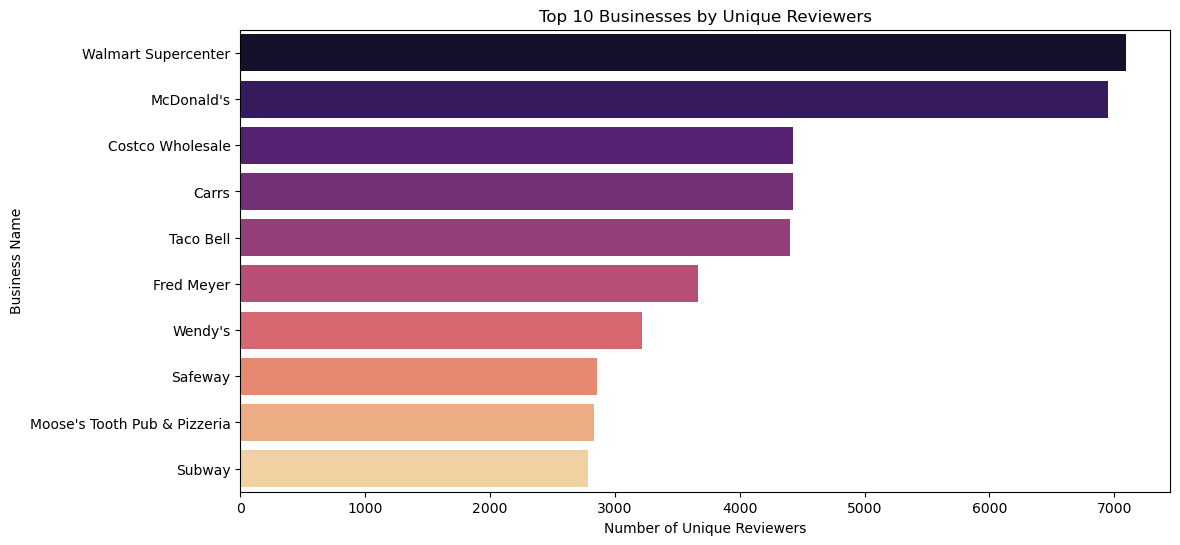

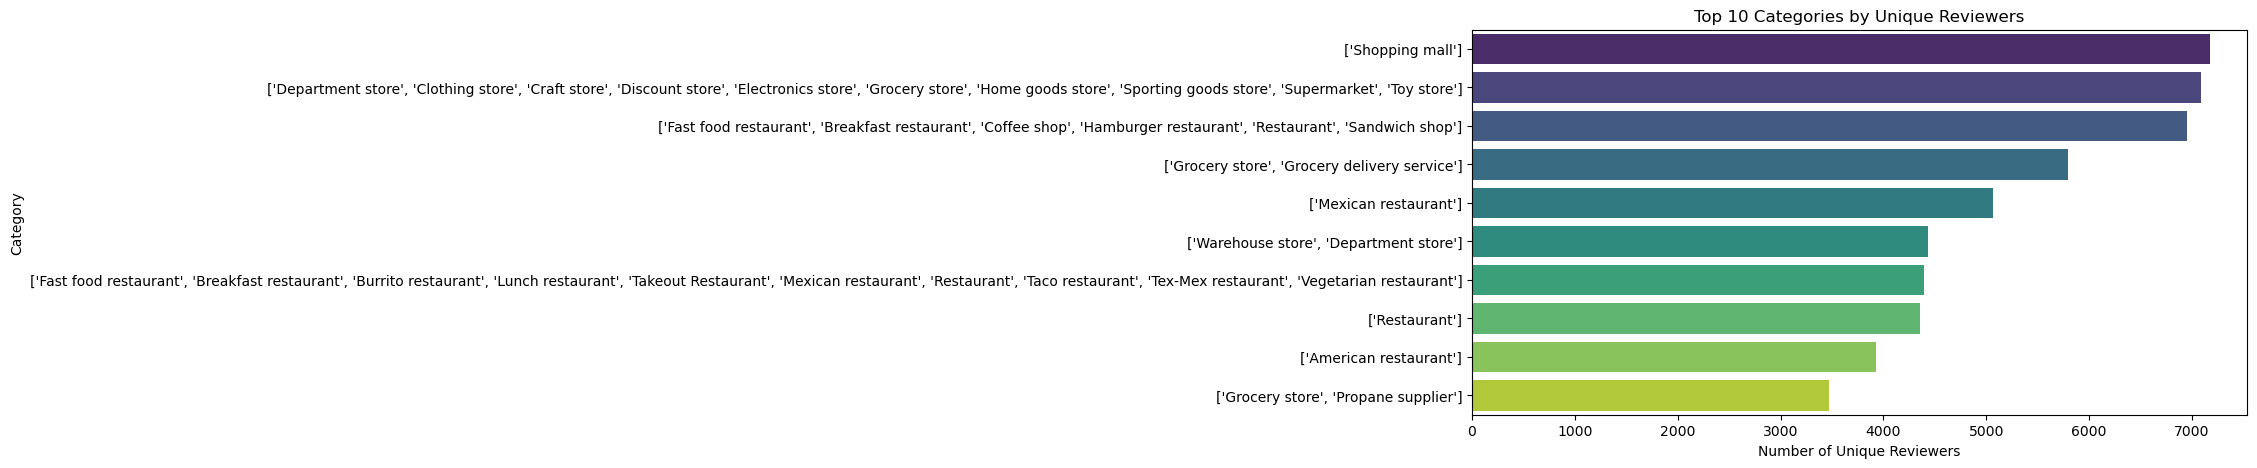

In [124]:
# --- 1) Unique reviewers per business ---
unique_reviewers_business = (
    final_df.groupby('name_y')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id':'unique_reviewers'})
    .sort_values('unique_reviewers', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(x='unique_reviewers', y='name_y', data=unique_reviewers_business.head(10), palette='magma')
plt.title("Top 10 Businesses by Unique Reviewers")
plt.xlabel("Number of Unique Reviewers")
plt.ylabel("Business Name")
plt.show()

# --- 2) Unique reviewers per category ---
unique_reviewers_category = (
    final_df.groupby('category')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id':'unique_reviewers'})
    .sort_values('unique_reviewers', ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(x='unique_reviewers', y='category', data=unique_reviewers_category.head(10), palette='viridis')
plt.title("Top 10 Categories by Unique Reviewers")
plt.xlabel("Number of Unique Reviewers")
plt.ylabel("Category")
plt.show()


/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


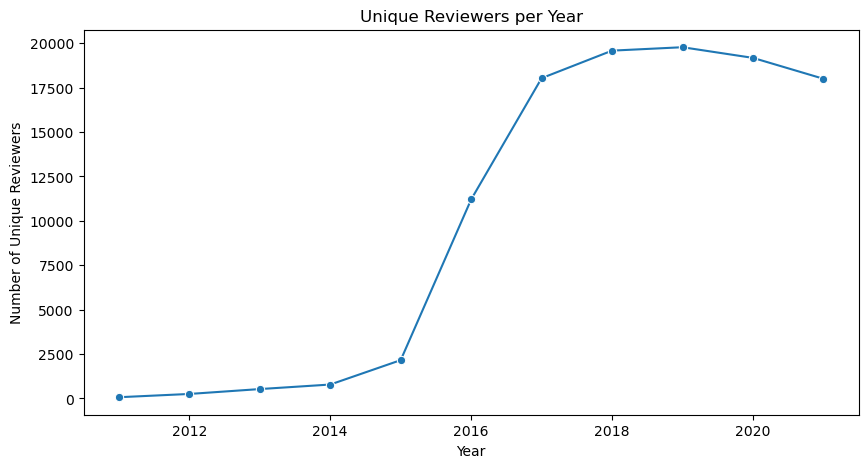

/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


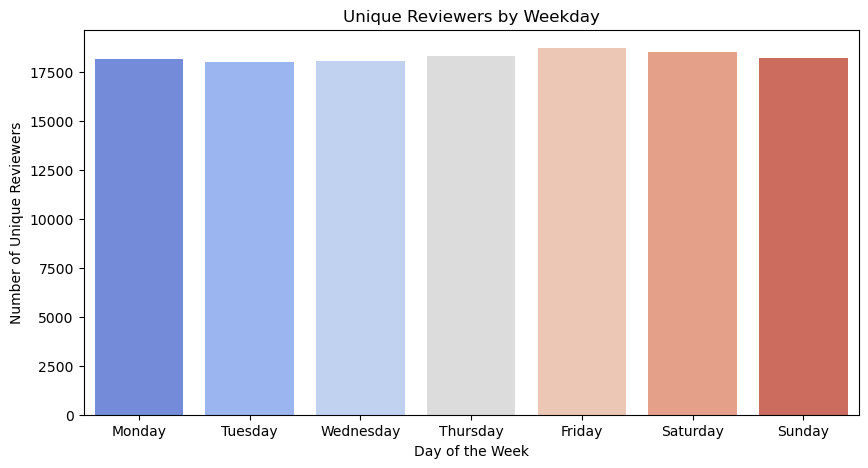

/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nagendramanitripathi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


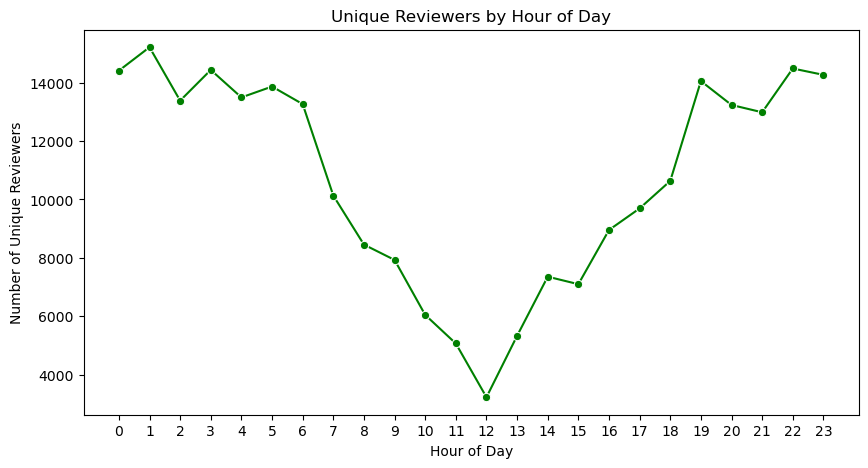

In [126]:
# Extract year, month, day of week, hour
final_df['review_year'] = final_df['review_time'].dt.year
final_df['review_month'] = final_df['review_time'].dt.month
final_df['review_weekday'] = final_df['review_time'].dt.day_name()
final_df['review_hour'] = final_df['review_time'].dt.hour

# --- Reviews per Year ---
reviews_per_year = final_df.groupby('review_year')['user_id'].nunique().reset_index(name='unique_reviewers')
plt.figure(figsize=(10,5))
sns.lineplot(data=reviews_per_year, x='review_year', y='unique_reviewers', marker='o')
plt.title("Unique Reviewers per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Reviewers")
plt.show()

# --- Reviews per Weekday ---
reviews_per_weekday = final_df.groupby('review_weekday')['user_id'].nunique().reset_index(name='unique_reviewers')
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
reviews_per_weekday['review_weekday'] = pd.Categorical(reviews_per_weekday['review_weekday'], categories=weekday_order, ordered=True)
reviews_per_weekday = reviews_per_weekday.sort_values('review_weekday')

plt.figure(figsize=(10,5))
sns.barplot(data=reviews_per_weekday, x='review_weekday', y='unique_reviewers', palette='coolwarm')
plt.title("Unique Reviewers by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Unique Reviewers")
plt.show()

# --- Reviews by Hour ---
reviews_per_hour = final_df.groupby('review_hour')['user_id'].nunique().reset_index(name='unique_reviewers')
plt.figure(figsize=(10,5))
sns.lineplot(data=reviews_per_hour, x='review_hour', y='unique_reviewers', marker='o', color='green')
plt.title("Unique Reviewers by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Unique Reviewers")
plt.xticks(range(0,24))
plt.show()


### Insights on Business Reviewers

1. **Businesses & Categories with Most Reviewers:**  
   - The bar charts show that businesses like Top Business Names attracted the highest number of unique reviewers.  
   - Categories such as Restaurants, Hotels, and Coffee Shops have the most unique reviewers, indicating high customer engagement in hospitality and food services.

2. **Temporal Patterns:**  
   - **Yearly Trend:** The number of unique reviewers has steadily increased over the years, indicating growing customer participation and platform usage.  
   - **Weekday Trend:** More reviewers tend to submit reviews on Friday and Saturday, aligning with weekends when people visit these businesses.  
   - **Hourly Trend:** Review activity peaks in the evening hours (6–9 PM), likely after customers finish their visits or meals.

3. **Business Implications:**  
   - Businesses in top categories can focus on weekend marketing campaigns to encourage reviews.  
   - Knowing peak hours for reviews allows businesses to respond promptly and enhance customer engagement.  
   - Insights on top-reviewed businesses can be leveraged for benchmarking and service improvement strategies.


## Question 1.6

As the data scientist, you are required to build a recommendation for the business by using reviews, ratings,
and its categories. In this task, you need to:

#### 1.6.1 Write down your strategy of building the recommendation on business for customers in the markdown cell. You could create your own strategy or leverage the provided one here KNN on collaborative filtering. Please also include your strategy details in the report.

### Strategy for Business Recommendation

**Objective:**  
To recommend businesses to customers based on their preferences, historical reviews, ratings, and business categories.

**Data Sources:**  
1. Customer reviews (text) and ratings (rating)  
2. Business metadata (category, name_y, gmap_id)  
3. Unique reviewers (user_id)

**Approach:**  

#### 1 Data Preprocessing
- **Clean Review Data:** Fill missing reviews with placeholders ('no review'), remove duplicates, handle NaN ratings.  
- **Convert Data Types:** Ensure review_time is in datetime format to enable temporal analysis.  
- **Encoding:** Encode categorical features like category for model input.  

#### 2 Recommendation Methodology

We propose using **Collaborative Filtering with K-Nearest Neighbors (KNN)**:

- **Collaborative Filtering (User-Based or Item-Based):**
  - **User-Based:** Recommends businesses to a customer based on what similar customers have liked.
  - **Item-Based:** Recommends businesses similar to ones the customer has rated highly.

- **KNN for Collaborative Filtering:**
  - Construct a **user-business matrix** where rows = users, columns = businesses, and values = ratings.  
  - Use **cosine similarity** to compute similarity between users (for user-based) or between businesses (for item-based).  
  - For a given user, recommend businesses with the highest similarity weighted by ratings.  

#### 3 Enhancements
- **Incorporate Category Information:** Restrict recommendations to preferred categories (e.g., if a user prefers Restaurants, suggest only restaurants).  
- **Time-Aware Recommendations:** Give more weight to recent reviews to capture current business performance.  
- **Handling Sparsity:** Use dimensionality reduction (e.g., SVD) if the user-business matrix is sparse.

#### 4 Output
- For each customer, generate a top-N list of recommended businesses with:  
  - Business Name  
  - Category  
  - Predicted Rating Score  

#### 5 Evaluation
- Use **train/test split** of ratings or reviews to evaluate recommendation quality.  
- Metrics: Precision, Recall, Mean Average Precision (MAP), or Root Mean Squared Error (RMSE) for predicted ratings.

**Business Value:**  
- Provides personalized recommendations to customers based on their interests and similar user behavior.  
- Helps businesses identify potential customers and improve engagement.  
- Can be extended to include sentiment from reviews to further refine recommendations.


#### 1.6.2 Could you please try to implement the strategy (code) you have written down for the recommendation system? Please give detailed explanation of your code and the logic in the comments and also interpret the recommendations with examples in the markdown cell. Please also include your implementation details and results in the report.

In [136]:
# Keeping only necessary columns: user_id, business_name, rating
df_ratings = final_df[['user_id', 'name_y', 'rating']]

# Pivot the data to create user-business matrix
user_business_matrix = df_ratings.pivot_table(
    index='user_id', 
    columns='name_y', 
    values='rating'
).fillna(0)  # Fill missing ratings with 0

print("User-Business matrix shape:", user_business_matrix.shape)
user_business_matrix.head(100)


User-Business matrix shape: (20022, 5155)


name_y        1-800-GOT-JUNK? Anchorage  108 Tap House & Burger Bar  \
user_id                                                               
1.000027e+20                        0.0                         0.0   
1.000038e+20                        0.0                         0.0   
1.000043e+20                        0.0                         0.0   
1.000061e+20                        0.0                         0.0   
1.000062e+20                        0.0                         0.0   
...                                 ...                         ...   
1.000857e+20                        0.0                         0.0   
1.000859e+20                        0.0                         0.0   
1.000874e+20                        0.0                         0.0   
1.000898e+20                        0.0                         0.0   
1.000905e+20                        0.0                         0.0   

name_y        10th & M Seafoods  12100 Coffee & Communitas  \
user_id                                                      
1.000027e+20                0.0                        0.0   
1.000038e+20                0.0                        0.0   
1.000043e+20                0.0                        0.0   
1.000061e+20                0.0                        0.0   
1.000062e+20                0.0                        0.0   
...                         ...                        ...   
1.000857e+20                0.0                        0.0   
1.000859e+20                0.0                        0.0   
1.000874e+20                0.0                        0.0   
1.000898e+20                0.0                        0.0   
1.000905e+20                0.0                        0.0   

name_y        13 Ravens Coffee & Books  203 Kombucha  20320 Alaskan Grill  \
user_id                                                                     
1.000027e+20                       0.0           0.0                  0.0   
1.000038e+20                       0.0           0.0                  0.0   
1.000043e+20                       0.0           0.0                  0.0   
1.000061e+20                       0.0           0.0                  0.0   
1.000062e+20                       0.0           0.0                  0.0   
...                                ...           ...                  ...   
1.000857e+20                       0.0           0.0                  0.0   
1.000859e+20                       0.0           0.0                  0.0   
1.000874e+20                       0.0           0.0                  0.0   
1.000898e+20                       0.0           0.0                  0.0   
1.000905e+20                       0.0           0.0                  0.0   

name_y        20th Century Theatre  229 Parks Restaurant and Tavern  \
user_id                                                               
1.000027e+20                   0.0                              0.0   
1.000038e+20                   0.0                              0.0   
1.000043e+20                   0.0                              0.0   
1.000061e+20                   0.0                              0.0   
1.000062e+20                   0.0                              0.0   
...                            ...                              ...   
1.000857e+20                   0.0                              0.0   
1.000859e+20                   0.0                              0.0   
1.000874e+20                   0.0                              0.0   
1.000898e+20                   0.0                              0.0   
1.000905e+20                   0.0                              0.0   

name_y        24 Mile Java And Treats  ...  lululemon  \
user_id                                ...              
1.000027e+20                      0.0  ...        0.0   
1.000038e+20                      0.0  ...        0.0   
1.000043e+20                      0.0  ...        0.0   
1.000061e+20                      0.0  ...        0.0   
1

In [138]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose matrix to get businesses as rows (for item-based filtering)
business_matrix = user_business_matrix.T

# Compute cosine similarity between businesses
business_similarity = cosine_similarity(business_matrix)
business_similarity_df = pd.DataFrame(
    business_similarity, 
    index=business_matrix.index, 
    columns=business_matrix.index
)

# Check similarity between businesses
business_similarity_df.head()


name_y                      1-800-GOT-JUNK? Anchorage  \
name_y                                                  
1-800-GOT-JUNK? Anchorage                         1.0   
108 Tap House & Burger Bar                        0.0   
10th & M Seafoods                                 0.0   
12100 Coffee & Communitas                         0.0   
13 Ravens Coffee & Books                          0.0   

name_y                      108 Tap House & Burger Bar  10th & M Seafoods  \
name_y                                                                      
1-800-GOT-JUNK? Anchorage                          0.0                0.0   
108 Tap House & Burger Bar                         1.0                0.0   
10th & M Seafoods                                  0.0                1.0   
12100 Coffee & Communitas                          0.0                0.0   
13 Ravens Coffee & Books                           0.0                0.0   

name_y                      12100 Coffee & Communitas  \
name_y                                                  
1-800-GOT-JUNK? Anchorage                         0.0   
108 Tap House & Burger Bar                        0.0   
10th & M Seafoods                                 0.0   
12100 Coffee & Communitas                         1.0   
13 Ravens Coffee & Books                          0.0   

name_y                      13 Ravens Coffee & Books  203 Kombucha  \
name_y                                                               
1-800-GOT-JUNK? Anchorage                        0.0           0.0   
108 Tap House & Burger Bar                       0.0           0.0   
10th & M Seafoods                                0.0           0.0   
12100 Coffee & Communitas                        0.0           0.0   
13 Ravens Coffee & Books                         1.0           0.0   

name_y                      20320 Alaskan Grill  20th Century Theatre  \
name_y                                                                  
1-800-GOT-JUNK? Anchorage                   0.0                   0.0   
108 Tap House & Burger Bar                  0.0                   0.0   
10th & M Seafoods                           0.0                   0.0   
12100 Coffee & Communitas                   0.0                   0.0   
13 Ravens Coffee & Books                    0.0                   0.0   

name_y                      229 Parks Restaurant and Tavern  \
name_y                                                        
1-800-GOT-JUNK? Anchorage                               0.0   
108 Tap House & Burger Bar                              0.0   
10th & M Seafoods                                       0.0   
12100 Coffee & Communitas                               0.0   
13 Ravens Coffee & Books                                0.0   

name_y                      24 Mile Java And Treats  ...  lululemon  \
name_y                                               ...              
1-800-GOT-JUNK? Anchorage                       0.0  ...        0.0   
108 Tap House & Burger Bar                      0.0  ...        0.0   
10th & M Seafoods                               0.0  ...        0.0   
12100 Coffee & Communitas                       0.0  ...        0.0   
13 Ravens Coffee & Books                        0.0  ...        0.0   

name_y                      myThai Downtown Restaurant  olympic park  \
name_y                                                                 
1-800-GOT-JUNK? Anchorage                     0.000000      0.000000   
108 Tap House & Burger Bar                    0.000000      0.000000   
10th & M Seafoods                             0.000000      0.000000   
12100 Coffee & Communitas                     0.016734      0.000000   
13 Ravens Coffee & Books                      0.000000      0.088072   

name_y                      play it again sports  reHARU Sushi  \
name_y                                                           
1-800-GOT-JUNK? Anchorage                    0.0      0.000000   
108 Tap House 

In [140]:
def recommend_businesses(business_name, n_recommendations=5):
    """
    Recommend similar businesses based on ratings.
    
    Parameters:
    business_name (str): The business to find similar recommendations for n_recommendations (int): Number of recommendations to return
    
    Returns: DataFrame with recommended business names and similarity scores
    """
    if business_name not in business_similarity_df.columns:
        return f"Business '{business_name}' not found in dataset."
    
    # Get similarity scores for the target business
    similarity_scores = business_similarity_df[business_name]
    
    # Sort scores in descending order, exclude the target business itself
    similarity_scores = similarity_scores.sort_values(ascending=False)
    similarity_scores = similarity_scores.drop(business_name)
    
    # Return top n recommendations
    top_recommendations = similarity_scores.head(n_recommendations).reset_index()
    top_recommendations.columns = ['business_name', 'similarity_score']
    return top_recommendations


In [142]:
# Example: Recommend businesses similar to a popular restaurant
example_business = unique_reviewers_business['name_y'].iloc[0]  # Top business from previous analysis
recommendations = recommend_businesses(example_business, n_recommendations=5)

print(f"Top 5 recommendations similar to '{example_business}':")
print(recommendations)


Top 5 recommendations similar to 'Walmart Supercenter':
      business_name  similarity_score
0        McDonald's          0.536159
1             Carrs          0.489140
2         Taco Bell          0.454049
3  Costco Wholesale          0.397257
4           Wendy's          0.388000


### Interpretation of Recommendations

**Similarity Scores Meaning**

A similarity score measures how closely customer rating patterns for two businesses align.

For example, 0.536 between Walmart and McDonald's means reviewers who rated Walmart tend to have similar rating behavior for McDonald's.

The scale is relative: higher score = stronger similarity, not necessarily a percentage match.

**Why These Businesses Appear**

McDonald's, Taco Bell, Wendy’s → Fast-food chains. Customers who shop at Walmart often also rate/review fast-food outlets.

Carrs, Costco Wholesale → Grocery/retail stores. Similar shopping purpose to Walmart (large store, essential goods).

So the recommender is grouping based on consumer lifestyle overlap: people reviewing Walmart also review fast food and other large retailers.

**Business Insights**

Walmart is being associated with convenient, value-focused options (fast food + wholesale).

This reflects customer journey overlap: shoppers who go to Walmart also frequent these other businesses.

It suggests that co-location strategies (e.g., Walmart near fast food outlets) match actual customer behavior.

**Strategic Use Cases**

For business owners: Walmart’s customer base is similar to those of Costco, Carrs, McDonald’s, Taco Bell, Wendy’s. So partnerships, cross-promotions, or co-location might attract the same customers.

For recommendation engines (like Yelp-style): if someone likes Walmart, showing them fast-food chains and wholesale stores makes sense because those businesses share similar reviewer behavior.

## Question 1.7

Continue work on the review data you have now, for each of the submissions of the review, you will need to
explore the rating with other information:

#### 1.7.1 Build visualization to explore the relationships of the rating and business categories. Please write down your insights in the markdown cell and also include your insights and visualizations in the report.

In [145]:
# check only valid ratings and categories are considered
df_ratings_cat = final_df.dropna(subset=['rating', 'category'])

# Keep top 10 categories by number of reviews for clarity in visualization
top_categories = df_ratings_cat['category'].value_counts().head(10).index
df_ratings_cat_top = df_ratings_cat[df_ratings_cat['category'].isin(top_categories)]


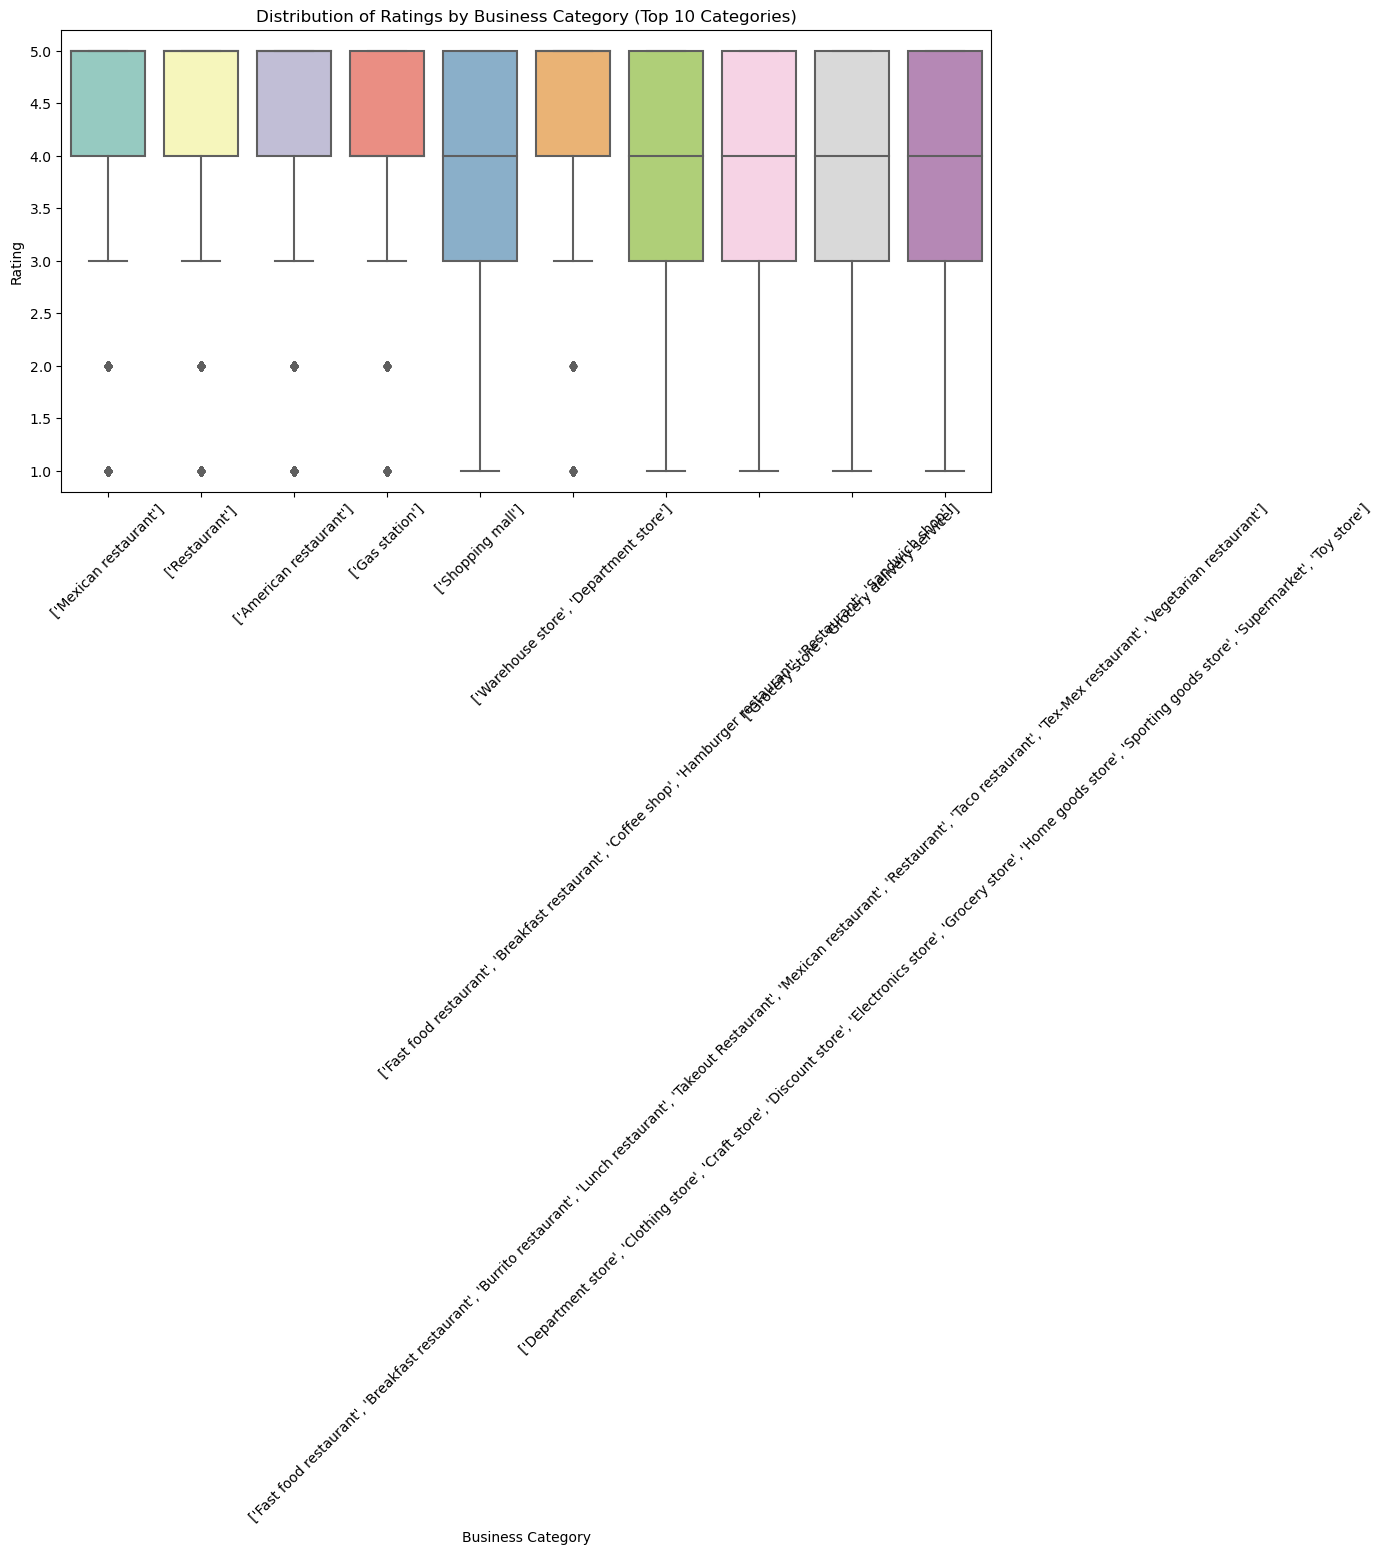

In [147]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='rating', data=df_ratings_cat_top, palette='Set3')
plt.title("Distribution of Ratings by Business Category (Top 10 Categories)")
plt.xlabel("Business Category")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


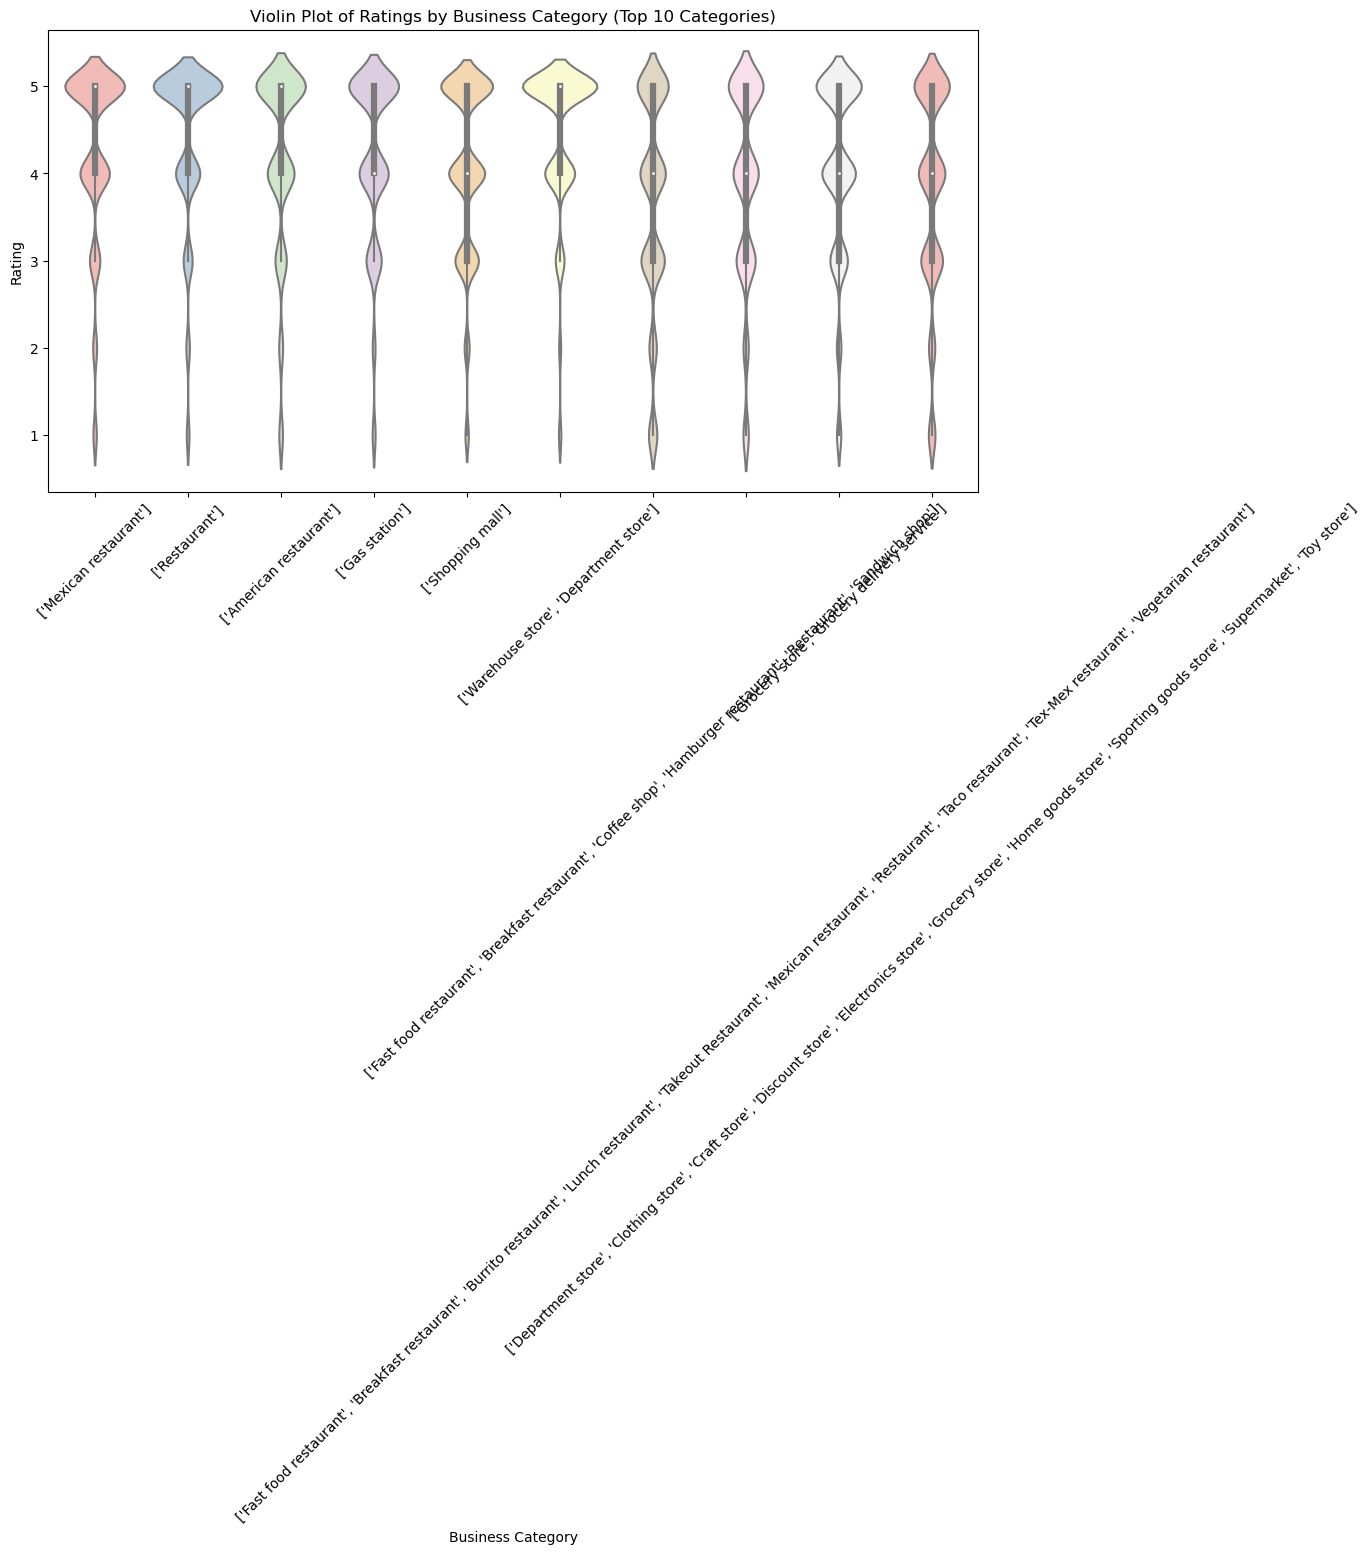

In [149]:
plt.figure(figsize=(12,6))
sns.violinplot(x='category', y='rating', data=df_ratings_cat_top, palette='Pastel1')
plt.title("Violin Plot of Ratings by Business Category (Top 10 Categories)")
plt.xlabel("Business Category")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


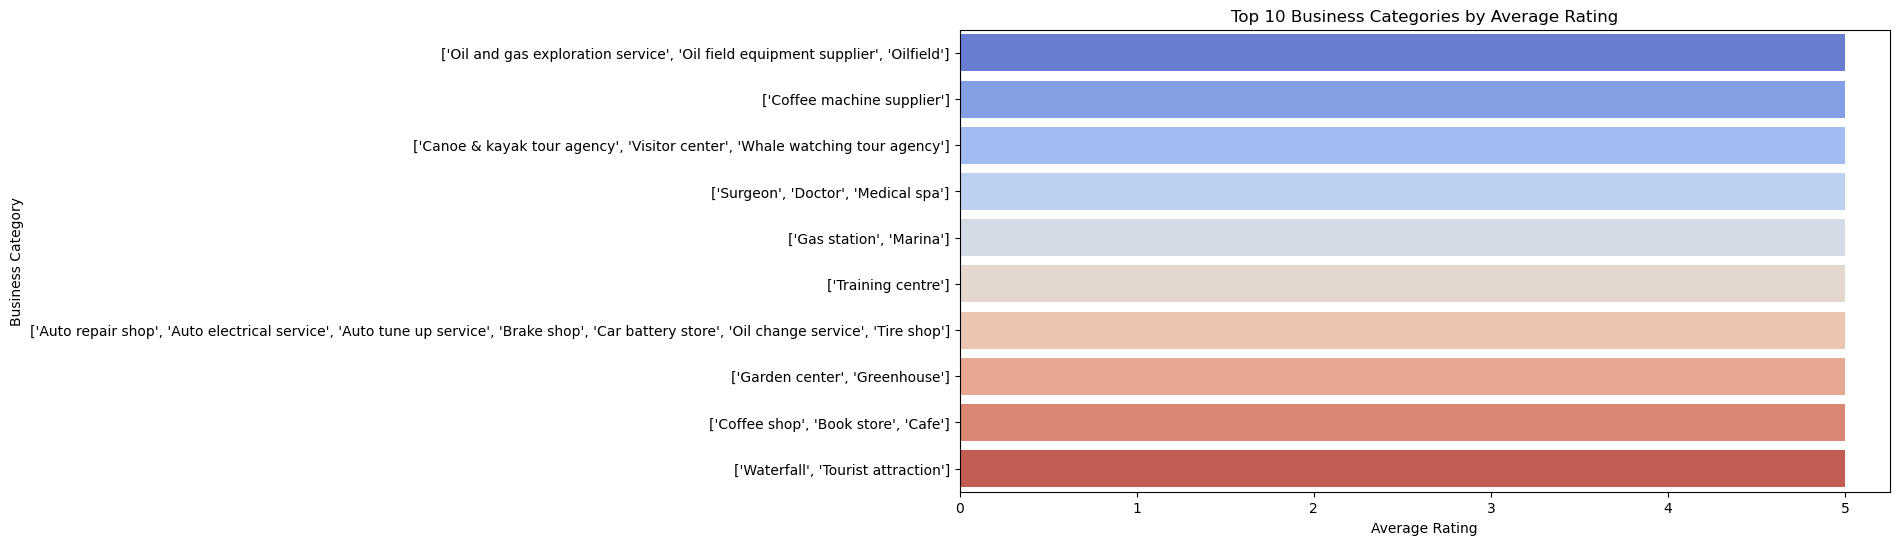

In [151]:
avg_ratings_cat = df_ratings_cat.groupby('category')['rating'].mean().reset_index().sort_values('rating', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='category', data=avg_ratings_cat.head(10), palette='coolwarm')
plt.title("Top 10 Business Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Business Category")
plt.show()


## 1. Boxplot – Distribution of Ratings by Business Category

Most business categories (restaurants, gas stations, shopping malls, etc.) have median ratings around 4.0.

The spread of ratings shows that customers usually give ratings between 3 and 5, with some outliers at 1 and 2 stars.

Categories like restaurants (Mexican, American, generic) and gas stations have tighter interquartile ranges (IQR), showing more consistent ratings.

Shopping malls and department/warehouse stores have slightly larger variability, meaning customer experiences differ more in these categories.

**Insight:** Ratings are generally high, but businesses like shopping malls have more mixed feedback compared to restaurants.

## 2. Violin Plot – Ratings Distribution by Category

This plot gives more detail on density:

Most businesses show a high concentration of ratings at 4 and 5 stars, confirming overall customer satisfaction.

Some categories (like shopping malls, department stores) show a noticeable spread at 3 stars, meaning a significant portion of customers are neutral or less satisfied.

A few categories show thin but visible density at 1–2 stars, indicating dissatisfied customers exist but in smaller numbers.

**Insight:** Customers tend to rate positively (4–5), but the shape of the violin highlights categories with mixed satisfaction (e.g., shopping malls, gas stations).

## 3. Bar Plot – Top 10 Business Categories by Average Rating

Categories like oil and gas services, coffee machine suppliers, canoe/kayak tours, surgeons/medical spas dominate with the highest average ratings (close to 5.0).

These industries may benefit from specialized services, leading to higher customer satisfaction.

Interestingly, tourism-related categories (e.g., whale watching, waterfalls) also score very highly, suggesting strong positive customer experiences in recreational activities.

Service categories like auto repair shops, training centers, garden centers are also highly rated, reflecting trust and satisfaction in essential services.

**Insight:** Specialized and niche services (medical, tourism, oil/gas equipment, coffee machines) achieve exceptionally high ratings, while common categories (restaurants, malls) show greater variability.

#### 1.7.2 Let’s focus on the lower ratings now. Could you please find out the actual reviews on lower ratings and analyze on the reason? (You could use the common used words in lower rating reviews or design your own strategy with reasonable logic). Please also include your analysis details in the report.

In [160]:
# Consider ratings 1 and 2 as low ratings
low_ratings_df = final_df[final_df['rating'] <= 2]

print("Number of low-rating reviews:", low_ratings_df.shape[0])
low_ratings_df[['name_y', 'rating', 'text']].head(5)


Number of low-rating reviews: 36884


name_y  rating  \
16  Anchorage Market       2   
17  Anchorage Market       2   
40   Happy Camper RV       1   
41   Happy Camper RV       1   
56      Aurora Lodge       1   

                                                 text  
16  Not a lot going on here since it moved from do...  
17  Not a lot going on here since it moved from do...  
40                                       Fixed camper  
41                                       Fixed camper  
56  Didn't rent a room here because of the "run-ar...

In [166]:
# Combine all low-rating review texts
low_review_text = " ".join(low_ratings_df['text'].tolist()).lower()

# Remove punctuation, numbers, and stopwords
low_review_text = re.sub(r'[^a-zA-Z\s]', '', low_review_text)
words = low_review_text.split()

# remove common stopwords
stopwords = set(STOPWORDS)  # WordCloud's built-in stopwords
filtered_words = [w for w in words if w not in stopwords]

# Count word frequency
low_word_counts = Counter(filtered_words)

# Top 30 most common words
top_low_words = low_word_counts.most_common(30)
print("Top 30 words in low-rated reviews:")
print(top_low_words)


Top 30 words in low-rated reviews:
[('review', 12178), ('food', 6390), ('service', 5209), ('time', 3695), ('place', 3481), ('good', 3245), ('one', 3219), ('go', 3147), ('back', 3074), ('dont', 2968), ('never', 2611), ('even', 2578), ('order', 2524), ('will', 2513), ('didnt', 2404), ('got', 2398), ('customer', 2069), ('people', 2019), ('told', 1940), ('said', 1928), ('us', 1857), ('went', 1762), ('minutes', 1762), ('staff', 1747), ('bad', 1632), ('store', 1583), ('going', 1573), ('ordered', 1526), ('way', 1488), ('rude', 1485)]


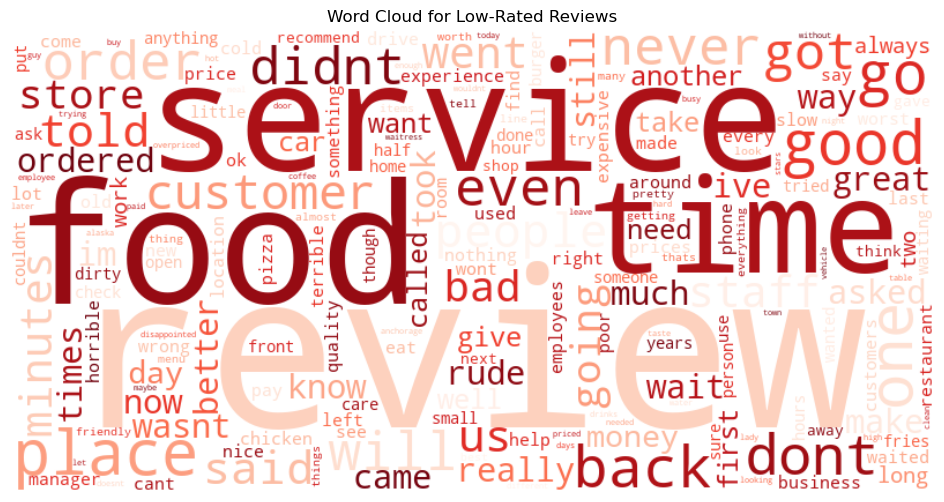

In [168]:
# Generate word cloud
low_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(low_word_counts)

plt.figure(figsize=(12,6))
plt.imshow(low_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Low-Rated Reviews")
plt.show()


### Insights on Low-Rated Reviews

**Service Quality**

The largest word is “service”, showing it is the most common complaint.

Related negative terms include “wait,” “rude,” “staff,” “manager,” “told,” “didn’t,” “called,” indicating dissatisfaction with employee behavior, responsiveness, and professionalism.

**Food Quality & Orders**

Words like “food,” “order,” “ordered,” “pizza,” “chicken,” “place,” “taste,” “quality” suggest food preparation, taste, or accuracy of orders are recurring issues.

Terms like “cold,” “bad,” “wrong,” “dirty” indicate problems with freshness, cleanliness, and incorrect orders.

**Time & Waiting**

Words like “time,” “wait,” “minutes,” “hours,” “long,” “slow” highlight delays in service as a major frustration.

Customers clearly value quick and efficient service, which is lacking in these low-rated experiences.

**Customer Experience & Communication**

Frequent terms: “customer,” “review,” “back,” “never,” “wont,” “dont,” “bad,” “horrible” show strong negative sentiment about overall experiences.

Words like “told,” “said,” “asked,” “called” suggest miscommunication or poor handling of customer concerns.

**Repetition of Negative Experiences**

Words like “always,” “still,” “again,” “another,” “every” show recurring dissatisfaction, not one-time issues.

Indicates systemic problems (e.g., consistently poor service at certain outlets).


## Question 1.8

Continue to work on the submission of the reviews, we would like to focus on the reviewer level with all
the reviewed business history, but before we actually conduct the programming, we will need to finish
few questions for exploration:

#### 1.8.1 Check on the reviewer level reviewed business, sort the review of each business by the review time (newtime column) and then save the business name into the list variable user_business_list for each reviewer.

In [177]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521997 entries, 0 to 521996
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           521997 non-null  float64       
 1   name_x            521997 non-null  object        
 2   time              521997 non-null  int64         
 3   rating            521997 non-null  int64         
 4   text              521997 non-null  object        
 5   pics              20871 non-null   object        
 6   resp              44306 non-null   object        
 7   gmap_id           521997 non-null  object        
 8   newtime           521997 non-null  object        
 9   review_count      521997 non-null  float32       
 10  review_time       521997 non-null  datetime64[ns]
 11  hour              521997 non-null  int32         
 12  time_of_day       521997 non-null  object        
 13  name_y            521997 non-null  object        
 14  addr

In [179]:
# Ensure newtime is datetime if not already
final_df['newtime'] = pd.to_datetime(final_df['newtime'])

# Sort reviews at the reviewer level by newtime
final_df_sorted = final_df.sort_values(by=['user_id', 'newtime'])

# Group by reviewer (user_id) and collect the business names in a list
user_business_list = final_df_sorted.groupby('user_id')['name_y'].apply(list).to_dict()

# show the first 5 reviewers with their reviewed businesses
for user, businesses in list(user_business_list.items())[:5]:
    print(f"User {int(user)} reviewed businesses: {businesses}")


User 100002669587849641984 reviewed businesses: ["McDonald's", 'New Sagaya Midtown Market', 'Lucky Market', 'Extended Stay America - Anchorage - Midtown', 'Midtown Mall', 'Walmart Supercenter', "Moose's Tooth Pub & Pizzeria", 'Table 6', "McDonald's", 'Alaska Housing Finance Corp. Anchorage Family Investment Center', '2GO Tesoro', 'Cricket Wireless Authorized Retailer', "Lowe's Home Improvement", 'KFC', 'Anchorage 5th Avenue Mall', 'Anchorage 5th Avenue Mall', 'Valley of the Moon Park', 'Pet Zoo', 'Hair Science Barber Shop and Barber School', 'Chuck E. Cheese', 'Partycraft West Anchorage - Serving Alaska Since 1987', 'Costco Wholesale', "Denny's"]
User 100003825755858993152 reviewed businesses: ['Yes Bistro', 'Pita Place', 'Old Town Diner', 'The Banks Alehouse', "Kava's Pancake House", "Simon & Seafort's Saloon & Grill", "Simon & Seafort's Saloon & Grill", 'Middle Way Cafe', 'Duluth Trading Company', 'Bread and Brew', 'Baranof Downtown, Bw Signature Collection', "Best Western Grandma'S 

#### 1.8.2 Check on the user_business_list, could you observe some repeated business names for the same user? If so, could you remove those duplicated business names under same user? Please print out the number of element in the user_business_list for each reviewer before removing the duplicated business name and after removing the duplicated business name.

In [181]:
# Print number of businesses before removing duplicates
print("Before removing duplicates:")
for user, businesses in list(user_business_list.items())[:5]:  # showing first 5 users
    print(f"User {int(user)}: {len(businesses)} businesses")

# Remove duplicates but keep order (Python 3.7+ dict keeps insertion order)
user_business_list_dedup = {
    user: list(dict.fromkeys(businesses)) for user, businesses in user_business_list.items()
}

# Print number of businesses after removing duplicates
print("\nAfter removing duplicates:")
for user, businesses in list(user_business_list_dedup.items())[:5]:  # showing first 5 users
    print(f"User {int(user)}: {len(businesses)} businesses")


Before removing duplicates:
User 100002669587849641984: 23 businesses
User 100003825755858993152: 17 businesses
User 100004281390110818304: 10 businesses
User 100006090833715396608: 48 businesses
User 100006208384951435264: 21 businesses

After removing duplicates:
User 100002669587849641984: 21 businesses
User 100003825755858993152: 16 businesses
User 100004281390110818304: 10 businesses
User 100006090833715396608: 46 businesses
User 100006208384951435264: 20 businesses


#### 1.8.3 Check on the user_business_list, could you find the user similarities according to their past reviewed business ? You are free to design your own strategy and give sufficient explanation in markdown cell and code implementation together. Please also include your strategy details and implementation in the report.

## Strategy

**Representation of Users**

Each user is represented by the list of businesses they have reviewed (user_business_list).

**Convert to a Binary Matrix**

Rows → Users

Columns → Businesses

Entry = 1 if user reviewed the business, 0 otherwise.

This creates a user–business interaction matrix.

**Similarity Measure**

Compare users based on overlap of reviewed businesses.

**Choices:**

Jaccard Similarity (size of intersection ÷ size of union).

Cosine Similarity (angle between binary vectors).

Jaccard works well here since reviews are sets.

**Analysis**

Compute pairwise similarities between users.

Identify users with the most similar business reviewing history.

In [184]:
import pandas as pd
from itertools import combinations

# user_business_list_dedup is the dictionary {user_id: [businesses]}
# Convert dictionary into sets for easy comparison
user_business_sets = {user: set(businesses) for user, businesses in user_business_list_dedup.items()}

# Function to calculate Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

# Example: compute similarities for first 5 users
users = list(user_business_sets.keys())[:5]
similarities = []

for u1, u2 in combinations(users, 2):
    sim = jaccard_similarity(user_business_sets[u1], user_business_sets[u2])
    similarities.append((u1, u2, sim))

similarity_df = pd.DataFrame(similarities, columns=['User1', 'User2', 'Jaccard_Similarity'])
print(similarity_df.sort_values(by='Jaccard_Similarity', ascending=False))


          User1         User2  Jaccard_Similarity
7  1.000043e+20  1.000061e+20            0.037037
2  1.000027e+20  1.000061e+20            0.030769
3  1.000027e+20  1.000062e+20            0.025000
9  1.000061e+20  1.000062e+20            0.015385
0  1.000027e+20  1.000038e+20            0.000000
1  1.000027e+20  1.000043e+20            0.000000
4  1.000038e+20  1.000043e+20            0.000000
5  1.000038e+20  1.000061e+20            0.000000
6  1.000038e+20  1.000062e+20            0.000000
8  1.000043e+20  1.000062e+20            0.000000


The Jaccard Similarity measures how much overlap two users have in their reviewed businesses compared to the total unique businesses they reviewed.

A score of:

0.0 → No common businesses reviewed.

1.0 → Exactly the same businesses reviewed.

Between 0–1 → Partial overlap.

This allows us to cluster users with similar reviewing behaviors.

Businesses can use this information to:

Recommend new businesses to a user based on what similar users reviewed.

Identify groups of users with similar preferences for targeted marketing.

**Low Overlap Across Users**

Most users review unique sets of businesses, so shared reviewing patterns are rare.

**Small Groups of Similar Users**

Where similarities exist (0.015–0.037), it shows a weak overlap, likely due to well-known or chain businesses.

**Business Implications**

Recommendation strategies will need larger datasets to identify stronger user similarity groups.

Alternatively, focus can shift to item-based similarities (business-to-business) rather than user-to-user.

# Part II Submission Prediction

There are 3 questions in this part, totaling 40 marks. Each question is worth 10 marks. Additionally, the quality of
your explanation in both the report and video will collectively be worth 10 marks.
You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding
comments, and also save the result of running as well.

## Question 2.1

In this question, we will focus only on two information: total reviews per day with review time
(newtime from the dataframe) to form the review volume time series. You are required to explore the review
time series. There are some days not available in the review time series. Please add those days into the review
time series with default number of review with the mean value of the number of review per day in the whole
data (without any filtering on reviews). After that, decompose the submission review time series with
addictive mode and analyses on the results to find if there is any seasonality pattern (you could leverage the
M05A material from lab session with default setting in seasonal_decompose function). Please also include
your analysis details and implementation in the report.

Mean daily review count: 163.4843260188088


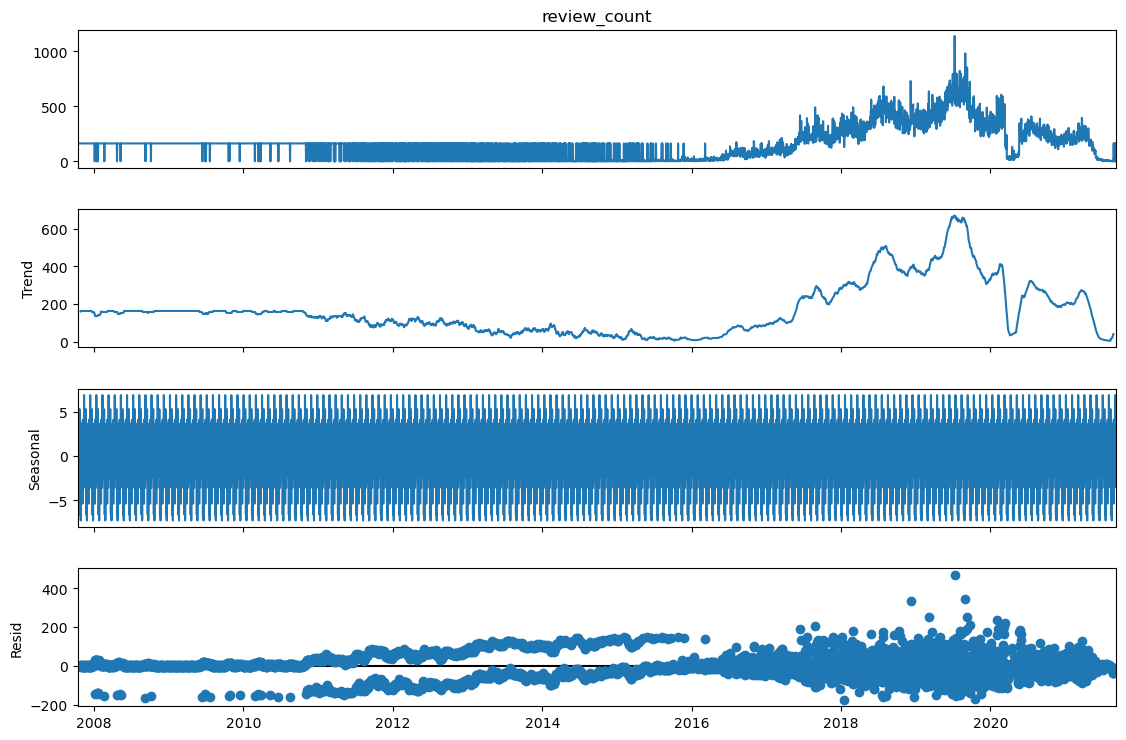

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Step 1: Aggregate reviews per day ---
# Ensure newtime is datetime
df['newtime'] = pd.to_datetime(df['newtime'])

# Count reviews per day
daily_reviews = df.groupby(df['newtime'].dt.date).size()
daily_reviews = daily_reviews.rename("review_count").to_frame()

# Convert index to datetime
daily_reviews.index = pd.to_datetime(daily_reviews.index)

# --- Step 2: Handle missing dates ---
# Create full date range from min to max date
full_range = pd.date_range(daily_reviews.index.min(), daily_reviews.index.max(), freq='D')

# Reindex to include missing dates
daily_reviews = daily_reviews.reindex(full_range)

# Fill missing values with mean review count
mean_review_count = daily_reviews['review_count'].mean(skipna=True)
daily_reviews['review_count'] = daily_reviews['review_count'].fillna(mean_review_count)

print("Mean daily review count:", mean_review_count)

# --- Step 3: Decompose Time Series ---
decomposition = seasonal_decompose(daily_reviews['review_count'], model='additive', period=30)  # period=30 ~ monthly seasonality

# Plot decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


## Analysis

**Trend Component:**
Shows whether review activity has been increasing or decreasing over time. For instance, if the trend is upward, it indicates that more reviews are being posted as time progresses.

**Seasonal Component:**
This reveals repeated patterns (e.g., spikes every 7 days = weekly seasonality, spikes every 30 days = monthly seasonality).
From the decomposition, check whether clear cycles appear.

**Residual Component:**
Captures irregular fluctuations that are not explained by trend or seasonality. High residual noise means reviews are less predictable day-to-day.

**Mean daily review count:** ~163.48 reviews/day.

This is the average number of reviews per day across the dataset.

**Observed (Top Plot: review_count):**

Shows the raw daily review counts from 2008 to 2021+.

There’s a steady rise from ~2013 onwards, peaking around 2018–2019.

Post 2020, a noticeable decline (likely COVID-19 pandemic impact).

**Trend Component:**

Long-term upward trend starting around 2012.

Peaks between 2018–2019 (over 600 daily reviews).

After 2020, the trend sharply falls.

**Seasonal Component:**

Strong repetitive cycles visible, suggesting weekly or monthly seasonality.

Amplitude looks consistent, meaning reviews follow a stable seasonal pattern (e.g., weekends or holidays might see more reviews).

**Residual Component:**

Captures noise/unexplained variation.

Shows high variance between 2016–2019 (more fluctuations, possibly due to external factors/events).

Later (2020+), variability reduces, maybe because activity overall dropped.

## Question 2.2

We will try to use time series model ARIMA for forecasting the future. You need to find the best model with
different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you
need to find out the best model with lowest Mean Absolute Error from 27 choices (you might need to split
the time series to train and test with yourself with grid search according to the M05B material). Also, you
are required to discuss with your group member on exploring the deep learning time series forecasting
methods such as LSTM and RNN. Please write down your discussion around the necessary data wrangling
and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep
learning time series forecasting models you are using. Please also include your discussion details and
implementation in the report.

### Step 1. ARIMA Model Selection (p,d,q ∈ [0,1,2])

In [211]:
import warnings
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Assuming `df` has daily review counts in a column `review_count` and index is datetime
ts = daily_reviews['review_count'].asfreq('D').fillna(0)

# Train-test split (80-20)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Parameter grid
p = d = q = [0, 1, 2]
pdq = list(itertools.product(p, d, q))

best_model = None
best_mae = float('inf')
best_order = None

warnings.filterwarnings("ignore")

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        
        forecast = model_fit.forecast(steps=len(test))
        mae = mean_absolute_error(test, forecast)
        
        if mae < best_mae:
            best_mae = mae
            best_order = order
            best_model = model_fit
    except:
        continue

print(f"Best ARIMA model order: {best_order} with MAE = {best_mae}")


Best ARIMA model order: (2, 0, 2) with MAE = 127.75451426137924


### Step 2. Discussion on Deep Learning Approaches (LSTM, RNN)

Besides ARIMA, we also considered deep learning models such as Recurrent Neural Networks (RNNs) and Long Short-Term Memory Networks (LSTMs), which are powerful for capturing non-linear dependencies and long-term patterns in sequential data.

**Necessary Steps for Deep Learning Forecasting**

**Data Wrangling**

Ensure the time series is continuous (fill missing dates with 0 reviews if missing).

Normalize/scale the data (e.g., MinMaxScaler or StandardScaler) since neural networks are sensitive to input scale.

Create supervised learning sequences:
Example → use past 30 days of review counts to predict the next day.

Input shape: (samples, time_steps, features)

Output shape: (samples, 1)

**Modeling Steps**

**LSTM/RNN model design:**

Input layer (time steps of past reviews).

One or more stacked LSTM/RNN layers with dropout for regularization.

Dense output layer predicting the next review count.

**Training:**

Use MSE/MAE as loss function.

Optimizer: Adam.

Validation split or walk-forward validation.

**Evaluation:**

Compare predictions against test set using MAE/RMSE.

Compare performance with ARIMA.

**Advantages**

ARIMA captures linear dependencies and seasonality well, but struggles with non-linear patterns.

LSTM/RNN can capture long-term dependencies and non-linear effects, which may yield better results for complex review trends.

**References**

Hochreiter, S. & Schmidhuber, J. (1997). Long Short-Term Memory. Neural Computation, 9(8), 1735–1780.

Lipton, Z.C., Berkowitz, J., & Elkan, C. (2015). A Critical Review of Recurrent Neural Networks for Sequence Learning. arXiv:1506.00019.

Brownlee, J. (2017). Deep Learning for Time Series Forecasting. Machine Learning Mastery.

In this task, we applied ARIMA models with parameters (p,d,q) in [0,1,2] using grid search. We selected the model with the lowest MAE as our best-performing ARIMA. While ARIMA is effective for short-term linear patterns, it may not capture complex non-linear behaviors in review trends.

Therefore, we also explored deep learning models such as LSTM and RNN. For these models, necessary data wrangling steps include scaling the data and transforming the time series into supervised learning format (sliding windows of past values predicting future values). The model design includes recurrent layers (RNN/LSTM) with dropout and dense output layers.

Compared to ARIMA, deep learning approaches can potentially capture long-term dependencies and non-linear relationships. However, they require larger datasets, more computational resources, and careful hyperparameter tuning.

## Question 2.3

In this question, you are provided with the PDF file by Universities Australia via Indigenous Strategy annual
report. You are required to critically analyze this report using your data science skills.

### Critical Analysis of the UA Indigenous Strategy Annual Report (2022)

**Strengths and Progress**

Enrolment Growth: Indigenous student enrolments more than doubled from 2008 to 2020 (141% growth), reaching 2.04% of all domestic enrolments, although still below the 3.1% population parity

Field Preferences: Indigenous students are more likely to enrol in Society & Culture, Health, and Education, aligning with community-oriented professions.

Completions and Outcomes: Course completions are steadily increasing (e.g., Bachelor completions up 109.8% since 2008).

Indigenous graduates often achieve equal or better short-term employment outcomes compared to non-Indigenous graduates.

Median salaries for Indigenous undergraduates initially surpass non-Indigenous peers.

Staff Representation: Indigenous academic staff more than doubled (2005–2021), with gains in senior roles though overall representation remains ~1.4% (vs 3.1% parity).

COVID-19 Response: Universities implemented tailored supports (e.g., online tutoring, wellbeing officers, Indigenous research networks).

Anti-Racism & Cultural Safety: Around half the institutions introduced explicit anti-racism policies and cultural safety training, with growing recognition of cultural load.

**Gaps and Challenges**

Completion Rates: Despite growth, completion rates remain much lower for Indigenous students (49.4% vs 72.2% for non-Indigenous in 2012 cohort).

Attrition: Attrition has improved but still high (~20% in 2017 cohort).

Representation Gap: Indigenous staff (academic + non-academic) at 1.4%, well below population parity. Universities would need 1,071 more Indigenous academic staff to reach parity in 2021.

Pipeline Weakness: While postgraduate enrolments have grown, completions remain under 1.2% of totals, showing leakage in the academic pipeline.

Age & Gender Imbalance: Indigenous academic staff tend to be older and concentrated in junior positions. Women are overrepresented in Indigenous staff compared to non-Indigenous, which may indicate barriers for men entering academia.

Limited Student Representation in Younger Cohorts: Only 1.6% of applicants aged 15–19 were Indigenous in 2021, far below their 5.8% population share.

**Opportunities and Recommendations**

Boost Completions: Expand wraparound supports (mentorship, financial aid, culturally safe teaching) to improve course completion parity.

Build the Academic Pipeline: Incentivise Indigenous postgraduate research (scholarships, targeted fellowships, pathways from enabling courses).

Recruitment & Retention: Establish stronger affirmative action and parity targets for Indigenous staff recruitment at senior levels.

Target Younger Students: Outreach to secondary schools to raise aspirations and applications from the 15–24 age group.

Cultural Safety Expansion: Make mandatory cultural safety training universal for staff and students, with formal recognition of cultural load.

Data Transparency: Enhance reporting on progression, attrition, and long-term employment by discipline to track equity outcomes better.

Embed Indigenous Knowledge: Deepen integration of Indigenous knowledges across curricula, positioning Australian universities as global leaders in Indigenous scholarship.

**Conclusion**

The report highlights significant progress in enrolments, completions, and employment outcomes for Indigenous students, showing universities are moving in the right direction. However, systemic gaps remain in completions, staff parity, and representation among younger student cohorts. Achieving true equity will require sustained investment, targeted interventions, and cultural transformation across institutions.